###  <span style="font-family: Arial; font-weight:bold; font-size:1.9em; color:#0e92ea"> Steven Gilbert Archuleta</span>

<font color='orange'>
&nbsp;
    


###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> AllLife Bank Customer Segmentation (AIML Project 06)
  
<font color='orange'>

&nbsp;

Due: 16 OCT 2021 06:30 local time

Sacramento, California (PDT)

&nbsp;
[My GitHub Link for Project 6](https://github.com/GL-AIML-International/gl-pgp-aiml-ba-uta-intl-may21-stevearchuleta)

***

###  <span style="font-family: Arial; font-weight:bold;font-size:1m;color:#0e92ea"> Objectives:

<font color=darkblue>
&nbsp;
    
Objective
1.	Explore and visualize the dataset.
2.	Apply K-Means Clustering (Elbow Curve and Silhouette Score); Calculate the appropriate number of clusters.
3.	Apply Hierarchical Clustering (various linkage methods); Plot dendrograms; Calculate the appropriate number of clusters.
4.	Compare clusters; Perform Cluster Profiling.
5.  Insights and Recommedations.
6.  Identify different segments in the existing customer based on their spending patterns, as well as past interaction with the bank. Use clustering algorithms and provide recommendations to the bank on how to better market to and service these customers.


###  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Background and Context:
  
<font color=darkblue>

&nbsp;



Herein, I am a Data Scientist for AllLife Bank, which wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers, as well as upsell to existing customers. Another insight from the market research team was that the customers tend to perceive the support services of the bank quite poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. The head of Marketing and Head of Delivery both decided to reach out to the Data Science team for help.



***


###  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Data Dictionary (Raw CSV Data):

<font color=darkblue>
&nbsp;
    
This dataset represents key attributes of the "AllLife Bank" customer database.
 

The data provided denotes various customers of a bank and their financial attributes like: credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including physically visiting the bank, online correspondence, and through the bank's call center).
    
    
The raw csv file contains the following variables:


###  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Attributes/Series/Features:
  
<font color=darkblue>

&nbsp;

[Sl_No](#1) -- Primary key of the records

<font color=orange>


<br> 
    
<font color=darkblue> 
    
[Customer Key](#2) -- Customer identification number

<font color=orange>

    

<br>
    
<font color=darkblue>
    
[Average Credit Limit](#3) -- Average credit limit of each customer for all credit cards

<font color=orange>
110 unique integer values for 10,127 data objects (Range: 26 - 73)

<br>  
    
<font color=darkblue>  
    
[Total credit cards](#4) -- Total number of credit cards possessed by the customer

<font color=orange>
2 unique string values for 10,127 data objects (M, F)
    
<br>    
    
<font color=darkblue>  
    
[Total visits bank](#5) -- Total number of visits that customer made (yearly) personally to the bank
<font color=orange>
6 unique integer values for 10,127 data objects (0, 1, 2, 3, 4, 5)

<br> 
    
<font color=darkblue>
    
[Total visits online](#6) -- Total number of visits or online logins made by the customer (yearly)

<font color=orange>
8 unique string values for 8,608 data objects (N/A, Unknown, Uneducated, High School, College, Graduate, Post-Graduate, Doctorate ; includes N/A and Unknown values)

<br>  
    
<font color=darkblue>  
    
[Total calls made](#7) -- Total number of calls made by the customer to the bank or its customer service department (yearly)

<font color=orange>
4 unique string values for 9378 data objects ((NaN, Single, Married, Divorced; includes NaN values)

<br>  

***

<font color=orange>

## 1. IMPORT LIBRARIES AND PACKAGES

In [6]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

plt.style.use("ggplot")
sns.set_style("darkgrid")
sns.set()

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to compute distances
from scipy.spatial.distance import cdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet


# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

try:
    # See #1137: this allows compatibility for scikit-learn >= 0.24
    from sklearn.utils import safe_indexing
except ImportError:
    from sklearn.utils import _safe_indexing

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Principal Component Analysis
from sklearn.decomposition import PCA

# supress numerical display to 2 points of precision in scientific notation
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

***

<font color=orange>

## 2. READ THE DATASET INTO JUPYTER NOTEBOOK
    

In [7]:
data = pd.read_csv("Credit_Card_Customer_Data.csv")

# copy data to another varaible to avoid any changes to original/raw dataset
df = data.copy()
    
print(
    f"There are {df.shape[0]} data objects and {df.shape[1]} attributes/features in the AllLife Bank credit card dataset."
)



There are 660 data objects and 7 attributes/features in the AllLife Bank credit card dataset.


<IPython.core.display.Javascript object>

***

##  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> OVERVIEW OF DATASET

<font color=orange>
&nbsp;

3.  df Data Type     - pandas core frame dataframe
4.	Length        - number of data objects
5.	Shape           - (rows, columns) (data objects, attributes)
6.	Columns         - list of variable attributes
7.	List Comprehension  - column-based indexing integers for iloc() function
8.  Dictionary Comprehension - column-based key-value pairs
9.	Data Types   - value count of datatypes
10.	Info          - class, range index, data columns, data types, memory usage
11. Duplicated    - sum of duplicated data objects
12. Unique Values - number of unique values by column
13.	Null         - sum of missing values
14.  Head          - first 5 data objects
15.  Tail         - last 5 data objects
16. Sample(10)   - 10 random data objects  
17.	Describe        - five number summary of descriptive statistics
18. Describe       - include all; summary of categorical and numeric descriptive statistics 

<font color=orange>

## 3. Return the Pandas datatype for the dataframe named "df"

In [8]:
type(df)

pandas.core.frame.DataFrame

<IPython.core.display.Javascript object>

***

<font color=orange>

## 4. Return the number of data objects for the dataframe named "df"

In [9]:
len(df)

660

<IPython.core.display.Javascript object>

***

<font color=orange>

## 5. Return the shape of the Pandas dataframe named "df"
    
<font color=#0e92ea>
      
###### OBSERVATION: 
    There are 7 attributes/series/features in the AllLife Bank credit card dataset

In [10]:
df.shape

(660, 7)

<IPython.core.display.Javascript object>

***



<font color=orange>

## 6. Return the column label values for the Pandas dataframe named "df"

In [11]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

<IPython.core.display.Javascript object>

***

<font color=orange>

## 7. Return a LIST COMPREHENSION that maps an index integer to the column label values for the Pandas dataframe named "df"   
    
NOTE: These index numbers may be used in the iloc() function if/when referencing multiple columns 

In [12]:
# LIST COMPREHENSION - build a reference list of all columns and their indexes  (identify column name by index)

df_col_mapping_list = [f"{c[0]}:{c[1]}" for c in enumerate(df.columns)]
print(df_col_mapping_list)

['0:Sl_No', '1:Customer Key', '2:Avg_Credit_Limit', '3:Total_Credit_Cards', '4:Total_visits_bank', '5:Total_visits_online', '6:Total_calls_made']


<IPython.core.display.Javascript object>

***

<font color=orange>

## 8. Return a DICTIONARY COMPREHENSION that maps a key integer to the column label values for the Pandas dataframe named "df"   
NOTE: These key numbers may be used to reference/access particular columns 

In [13]:
# DICTIONARY COMPREHENSION - build a dictionary view of all columns and their indexes  (tool to rename columns, when needed)
df_col_mapping_dict = {c[0]: c[1] for c in enumerate(df.columns)}
print(df_col_mapping_dict)

{0: 'Sl_No', 1: 'Customer Key', 2: 'Avg_Credit_Limit', 3: 'Total_Credit_Cards', 4: 'Total_visits_bank', 5: 'Total_visits_online', 6: 'Total_calls_made'}


<IPython.core.display.Javascript object>

***

<font color=orange>

## 9. Return a count of the datatypes for each of the column label values for the Pandas dataframe named "df"

    
<font color=#0e92ea>
      
###### OBSERVATION: 
    There are 7 int64 features.

In [14]:
df.dtypes.value_counts()

int64    7
dtype: int64

<IPython.core.display.Javascript object>

***

<font color=orange>

## 10. Return a table that identifies the following "INFORMATION" about the Pandas dataframe named "df"

<font color=#0e92ea>
    
#### OBSERVABLE RETURN:
######  10a: type of data structure, 
######  10b: range of data objects, 
######  10c: number of column label values, 
######  10d: column index #, 
######  10e: column label value, 
######  10f: non-null count, 
######  10g: datatype for each column label value, 
######  10h: count of series datatypes, 
######  10i: memory usage
 
    
<font color=darkblue>     

###### OBSERVATIONS:
* Datatypes7 of the features are numeric
* Non-Null: No features have missing values.
* DROP: S1_No (no useable information)
* DROP: Customer Key (no useable information)

In [15]:
# Please read observations above
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

***

In [16]:
# 10.i Drop Primary Key and Customer ID
# Create df1 object)

df1 = df.drop(["Sl_No", "Customer Key"], axis=1)

<IPython.core.display.Javascript object>

In [17]:
# 10.i VERIFICATION

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


<IPython.core.display.Javascript object>

<font color=orange>

## 11. Return the sum of duplicated data objects in the Pandas dataframe named "df1"
    
    
<font color=darkblue>     

###### OBSERVATIONS:
* There are 11 duplicated data objects.
* Drop duplicates.
* Beginning SHAPE of df: (660, 7)
*   Current SHAPE of df: (649, 5)

In [18]:
# There are 11 duplicated data objects
df1.duplicated().sum()

11

<IPython.core.display.Javascript object>

In [19]:
# Drop Duplicate data objects
df1.drop_duplicates(inplace=True)

<IPython.core.display.Javascript object>

In [20]:
# Verification
df1.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [21]:
# Verification
df1.shape

(649, 5)

<IPython.core.display.Javascript object>

***

<font color=orange>

## 12. Return the number of unique values for each feature in the Pandas dataframe named "df1"
    
<font color=#0e92ea>
      
###### OBSERVATIONS for Unique Values:
* <span style='color:orange'>AVG CREDIT LIMIT: </span>  <span style="color:darkblue">There are 110 unique values unique values min: 3,000 to max: 200,000.
* <span style='color:orange'>TOTAL CREDIT CARDS:  </span> <span style="color:darkblue"> There are 10 unique values (1-10).
* <span style='color:orange'>TOTAL BANK VISITS:  </span>  <span style="color:darkblue">There are 6 unique values (0-5).
* <span style='color:orange'>TOTAL ONLINE VISITS:  </span> <span style="color:darkblue"> There are 16 unique values (0-15).
* <span style='color:orange'>TOTAL CALLS MADE:  </span>  <span style="color:darkblue">There are 11 unique values (0-10).


In [22]:
# OBSERVATION:  These are the number of unique values for each feature, which will become the basis for clustering all 649 data objects.

df1.nunique()

Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

<IPython.core.display.Javascript object>

***

<font color=orange>

## 12a. Return some unique values
    
<font color=#0e92ea>
      
###### OBSERVATIONS:
* <span style='color:orange'>Total Credit Cards:</span>  <span style="color:darkblue">2, 3, 7, 5, 6, 4, 1, 9, 8, 10
* <span style='color:orange'>Total Bank Visits:</span>  <span style="color:darkblue">1, 0, 2, 5, 3, 4
* <span style='color:orange'>Total Online Visits:</span>  <span style="color:darkblue">1, 10, 3, 12, 11, 2, 5, 4, 0, 14, 7, 13, 15, 6, 8, 9
* <span style='color:orange'>Total Calls Made:</span>  <span style="color:darkblue">0, 9, 4, 3, 8, 2, 1, 7, 5, 6, 10


In [23]:
# Return some unique values
# Please read observation above
# OBSERVATION: These are the unique values that will become the basis for the unsupervised clustering algorithms.

print("Average Credit Limit:", df1.Avg_Credit_Limit.unique())
print("\n\n")
print("Total_Credit_Cards:", df1.Total_Credit_Cards.unique())
print("\n\n")
print("Total_visits_bank:", df1.Total_visits_bank.unique())
print("\n\n")
print("Total_visits_online:", df1.Total_visits_online.unique())
print("\n\n")
print("Total_calls_made:", df1.Total_calls_made.unique())
print("\n\n")


Average Credit Limit: [100000  50000  30000  20000  15000   5000   3000  10000  13000  11000
   9000   6000   8000  19000  16000  18000  17000  14000  12000   7000
  73000  49000  67000  61000  75000  48000  56000  72000  70000  51000
  69000  40000  44000  31000  37000  65000  46000  74000  58000  39000
  52000  33000  47000  71000  41000  59000  64000  45000  54000  66000
  27000  43000  36000  25000  57000  26000  38000  35000  34000  28000
  63000  29000  68000  42000  62000  32000  60000  55000 157000  94000
 163000 131000  96000 136000 121000 158000 108000 166000 176000 178000
  91000 156000 146000  84000 155000 200000 195000 187000 106000 114000
 126000 173000 153000 184000 123000 144000  97000  98000 127000 171000
 186000 183000 111000 112000 132000  95000 172000  99000 145000 167000]



Total_Credit_Cards: [ 2  3  7  5  6  4  1  9  8 10]



Total_visits_bank: [1 0 2 5 3 4]



Total_visits_online: [ 1 10  3 12 11  2  5  4  0 14  7 13 15  6  8  9]



Total_calls_made: [ 0  9  4 

<IPython.core.display.Javascript object>

***

<font color=orange>

## 12. MISSING VALUES:   
## Return a table that identifies the sum of null values for each attribute in the Pandas dataframe named "df1"
    
<font color=#0e92ea>
      
###### OBSERVATIONS: 
* <span style='color:orange'>Total Missing Values:</span>  <span style="color:darkblue">0

In [24]:
# 12
# Please read observations above
# print true or false for features with missing values

print(df1.isnull().any())

# print the numeric total of all missing values

print("\n")
print("Number of total missing values: ", df1.isnull().sum().sum())

Avg_Credit_Limit       False
Total_Credit_Cards     False
Total_visits_bank      False
Total_visits_online    False
Total_calls_made       False
dtype: bool


Number of total missing values:  0


<IPython.core.display.Javascript object>

***

<font color=orange>

## 13. Return the first 5 data objects of the Pandas dataframe named "df1"

In [25]:
df1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<IPython.core.display.Javascript object>

***

<font color=orange>

## 14. Return the last 5 data objects of the Pandas dataframe named "df1"

In [26]:
df1.tail()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0
659,167000,9,0,12,2


<IPython.core.display.Javascript object>

***

<font color=orange>

## 15. Return a random sample of 10 data objects of the Pandas dataframe named "df1"

In [27]:
df1.sample(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
261,18000,5,3,0,4
282,6000,6,3,1,1
44,11000,4,2,4,5
245,10000,4,2,1,0
195,8000,2,1,4,8
328,14000,4,4,2,1
232,20000,5,4,1,0
627,146000,10,0,12,1
27,9000,2,2,2,10
355,10000,5,5,1,4


<IPython.core.display.Javascript object>

***

<font color=orange>

## 16. Return a table of aggragated "five number summary" values for the numeric attributes in the Pandas dataframe named "df1"
    
<font color=#0e92ea>
      
###### OBSERVATIONS: 
* <span style='color:orange'>Avg Credit Limit:</span> min=3000, max=200000 mean=34878.27, median=18000;  <span style="color:darkblue"> mean > median; right skewed distribution; 25 percent of customers have a credit limit over 49000; this feature might have an outlier.
* <span style='color:orange'>Total Credit Cards:</span> min=1, max=10, mean=4.71, median=5.00; <span style="color:darkblue">mean < median; slightly left skewed; 75 percent of customers have 6 credit cards or less. 
* <span style='color:orange'>Total Bank Visits:</span> min=0, max=5; mean=2.4, median=2.0<span style="color:darkblue"> mean > median; slightly right skewed; there are no outliers for this attribute. Fifty percent of customers have only visited the bank 1 or 2 times.
* <span style='color:orange'>Total Online Visits:</span> min=0, max=15; mean=2.62, median=2; <span style="color:darkblue"> mean > median, slightly rightt skew; 75% of customers have or less online visits; There could be outliers in this feature. 
* <span style='color:orange'>Total Calls Made:</span> min=0, max=10; mean=3.59, median=3.00; <span style="color:darkblue">mean > median, slightly right skewed; only 25% of customers have contacted the bank by telephone between 5 and 10 times.


In [28]:
# Describe Numeric Features
# Please read the observations that are listed above

df1.describe().round(2)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,649.00,649.00,649.00,649.00,649.00
mean,34878.27,4.71,2.40,2.62,3.59
std,37813.74,2.17,1.63,2.95,2.88
min,3000.00,1.00,0.00,0.00,0.00
25%,11000.00,3.00,1.00,1.00,1.00
50%,18000.00,5.00,2.00,2.00,3.00
75%,49000.00,6.00,4.00,4.00,5.00
max,200000.00,10.00,5.00,15.00,10.00


<IPython.core.display.Javascript object>

In [29]:
# Transposed
# Please read the observations that are listed above

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,649.00,34878.27,37813.74,3000.00,11000.00,18000.00,49000.00,200000.00
Total_Credit_Cards,649.00,4.71,2.17,1.00,3.00,5.00,6.00,10.00
Total_visits_bank,649.00,2.40,1.63,0.00,1.00,2.00,4.00,5.00
Total_visits_online,649.00,2.62,2.95,0.00,1.00,2.00,4.00,15.00
Total_calls_made,649.00,3.59,2.88,0.00,1.00,3.00,5.00,10.00


<IPython.core.display.Javascript object>

***

<font color=orange>

## 17. Return the value count for each numeric feature in the Pandas dataframe named "df1"
    
<font color=#0e92ea>
      
###### OBSERVATIONS:
* <span style='color:orange'>TOTAL VISITS IN BANK:</span> 2 (156), 1 (112), 3 (99), 0 (97), 5 (95), 4 (90); 
    
    14.9% of customers have not visited the bank.
    
    
* <span style="color:orange">TOTAL ONLINE VISITS</span> 2 (185), 0 (141), 1 (107), 4 (68), 5 (54), 3 (43), 15 (10), 7 (7), 10 (6), 12 (6), 8 (6), 11 (5), 13 (5), 9 (4), 14 (1), 6 (1); 
    
    21.7% of customers have not visited the bank online. 
    
    
* <span style='color:orange'>TOTAL CALLS MADE:</span> 4 (104), 0 (96), 2 (90), 1 (88), 3 (82), 6 (39), 7 (34), 9 (32), 8 (30), 5 (28), 10 (26); 
    
    14.9% of customers have not visited the bank.

In [30]:
# Numeric Value Counts (subtract out objects)
# See observations above

for iterator in df1.columns:
    print("The unique values in", iterator, "are:")
    print(df1[iterator].value_counts().sort_values(ascending=False))
    print("\n")
    print("=" * 40)
    print("\n")

The unique values in Avg_Credit_Limit are:
8000      32
6000      30
13000     28
9000      27
19000     26
10000     25
7000      24
11000     24
17000     23
14000     23
18000     22
16000     22
5000      20
20000     20
12000     17
15000     17
36000     11
70000     10
50000      8
38000      8
56000      7
39000      7
68000      7
34000      6
41000      6
48000      6
30000      6
74000      6
37000      6
65000      5
26000      5
47000      5
60000      5
31000      5
52000      5
29000      5
66000      4
59000      4
49000      4
69000      4
71000      4
64000      4
54000      4
51000      4
73000      4
33000      4
67000      3
46000      3
100000     3
58000      3
57000      3
72000      3
45000      3
62000      3
44000      3
61000      3
40000      3
28000      3
27000      2
35000      2
156000     2
75000      2
63000      2
32000      2
195000     2
84000      2
163000     2
166000     2
42000      2
172000     2
106000     1
145000     1
155000     1
112000  

<IPython.core.display.Javascript object>

***


<font color=orange>

## 18. Return a histogram and boxplot for five (5) numeric series attributes for the Pandas dataframe named "df1"
    
OBSERVATIONS
    

<font color=#0e92ea>
    
    
#### 18a. Average Credit Limit -- <span style='color:darkblue'>OBSERVATION:  min=3000, max=200000 mean=34878.27, median=18000; mean > median; right skewed distribution; 25 percent of customers have a credit limit over 49000; Over thirty outlier.</span>
#### 18b. Total Credit Cards -- <span style='color:darkblue'>OBSERVATION: mean less than median; slightly left skewed; 75 percent of customers have 6 credit cards or less.</span>
#### 18c. Total Bank Visits -- <span style='color:darkblue'>OBSERVATION:   mean > median; slightly right skewed; there are no outliers for this attribute. Fifty percent of customers have only visited the bank 1 or 2 times.</span>
#### 18d. Total Online Visits-- <span style='color:darkblue'>OBSERVATION: mean > median, slightly rightt skew; 75% of customers have or less online visits; Seven outliers.</span>
#### 18e. Total Calls Made -- <span style='color:darkblue'>OBSERVATION:  mean > median, slightly right skewed; only 25% of customers have contacted the bank by telephone between 5 and 10 times.</span>


In [31]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [32]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

<font color=#0e92ea>
    
#### 18a. Average Credit Limit

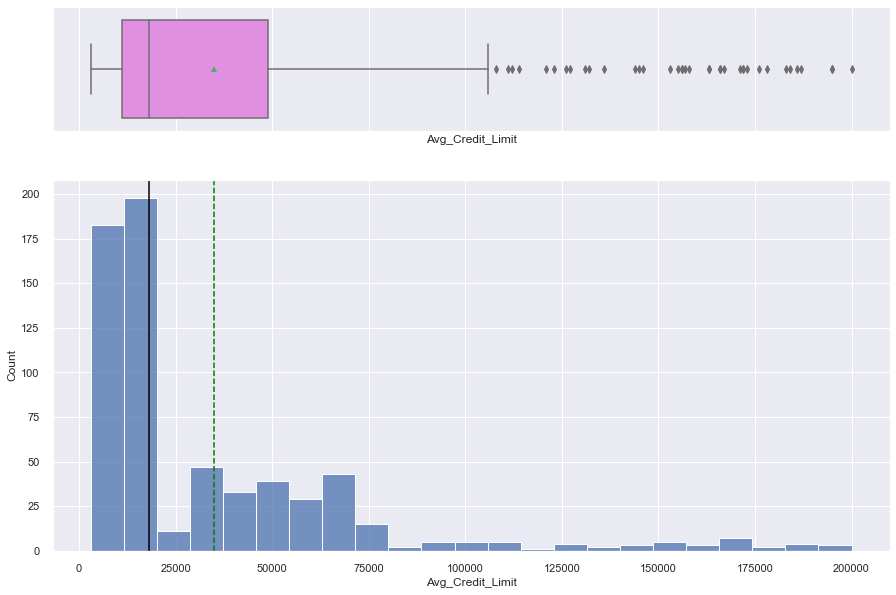

<IPython.core.display.Javascript object>

In [33]:
# 18a
# Please read the observations above for 18a

histogram_boxplot(df1, "Avg_Credit_Limit")

In [34]:
# Average Credit Limit Value Counts (normalized)

df1.Avg_Credit_Limit.value_counts(normalize=True)

8000     0.05
6000     0.05
13000    0.04
9000     0.04
19000    0.04
10000    0.04
7000     0.04
11000    0.04
17000    0.04
14000    0.04
18000    0.03
16000    0.03
20000    0.03
5000     0.03
12000    0.03
15000    0.03
36000    0.02
70000    0.02
50000    0.01
38000    0.01
56000    0.01
39000    0.01
68000    0.01
74000    0.01
37000    0.01
30000    0.01
34000    0.01
48000    0.01
41000    0.01
65000    0.01
26000    0.01
47000    0.01
60000    0.01
31000    0.01
52000    0.01
29000    0.01
33000    0.01
64000    0.01
73000    0.01
66000    0.01
51000    0.01
54000    0.01
59000    0.01
71000    0.01
69000    0.01
49000    0.01
40000    0.00
61000    0.00
44000    0.00
62000    0.00
28000    0.00
45000    0.00
46000    0.00
57000    0.00
67000    0.00
72000    0.00
100000   0.00
58000    0.00
172000   0.00
42000    0.00
166000   0.00
163000   0.00
84000    0.00
195000   0.00
27000    0.00
32000    0.00
63000    0.00
75000    0.00
156000   0.00
35000    0.00
173000   0.00
153000

<IPython.core.display.Javascript object>

<font color=#0e92ea>
    
    
#### 18b. Total Credit Cards

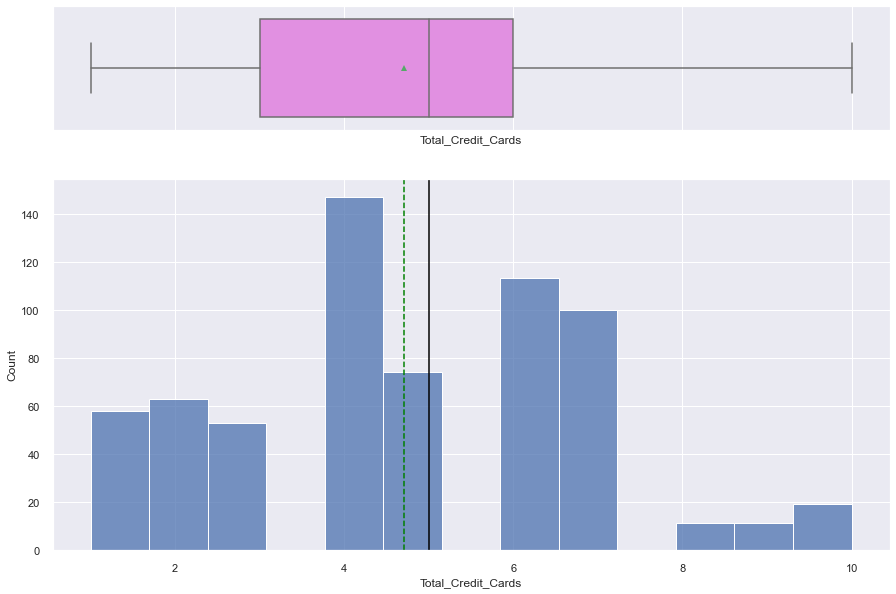

<IPython.core.display.Javascript object>

In [35]:
# 18b
# Please read the observations above for 18b

histogram_boxplot(df1, "Total_Credit_Cards")

In [36]:
# Total Credit Cards Value Counts (normalized)

df1.Total_Credit_Cards.value_counts(normalize=True)

4    0.23
6    0.17
7    0.15
5    0.11
2    0.10
1    0.09
3    0.08
10   0.03
8    0.02
9    0.02
Name: Total_Credit_Cards, dtype: float64

<IPython.core.display.Javascript object>

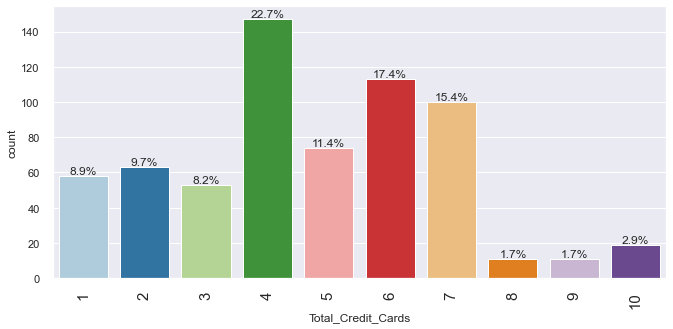

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(df1, "Total_Credit_Cards", perc=True)

<font color=#0e92ea>
    
    
#### 18c.  Total Bank Visits 

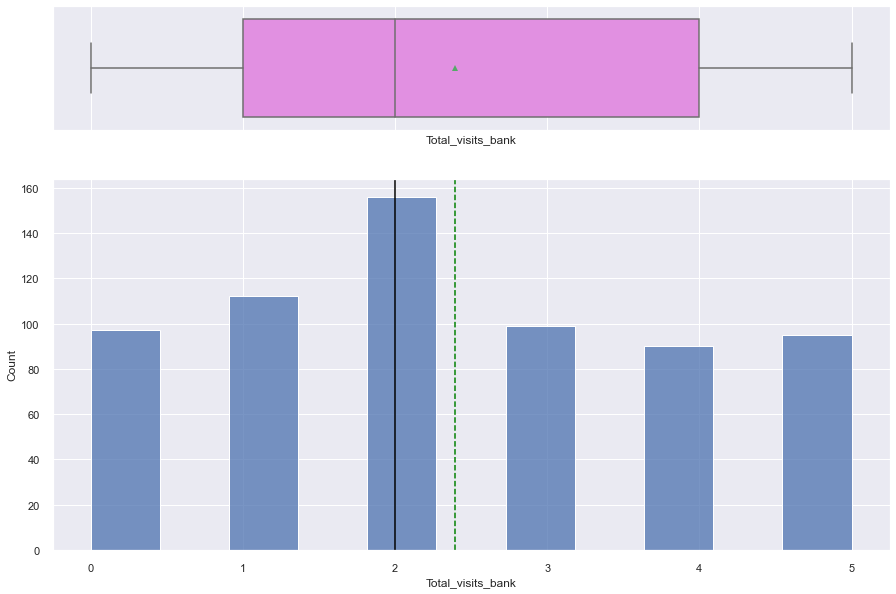

<IPython.core.display.Javascript object>

In [38]:
# 18c
# Please read the observations above for 18c

histogram_boxplot(df1, "Total_visits_bank")

In [39]:
# Total Bank Visits Value Counts (normalized)

df1.Total_visits_bank.value_counts(normalize=True)

2   0.24
1   0.17
3   0.15
0   0.15
5   0.15
4   0.14
Name: Total_visits_bank, dtype: float64

<IPython.core.display.Javascript object>

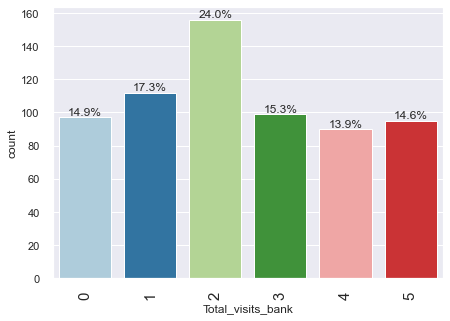

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(df1, "Total_visits_bank", perc=True)

<font color=#0e92ea>
    
    
#### 18d. Total Online Visits

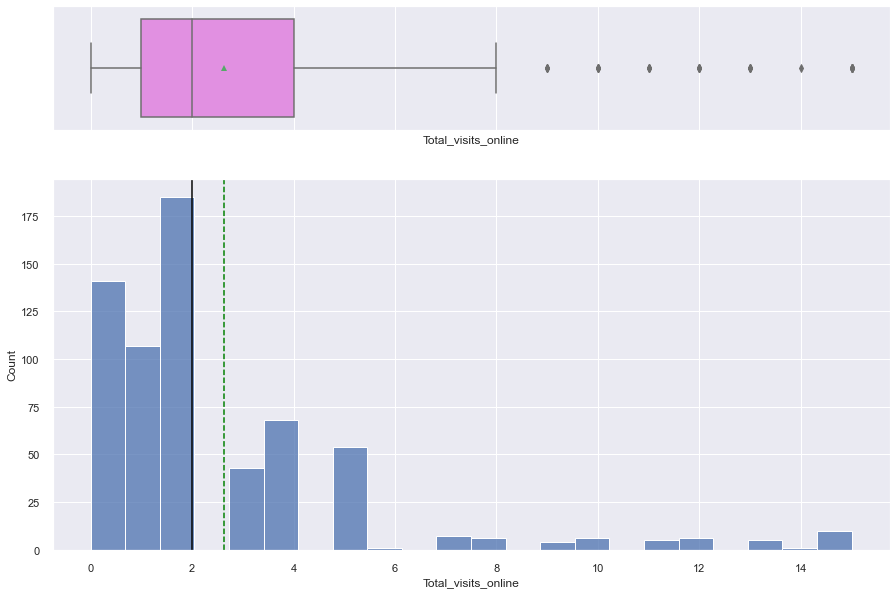

<IPython.core.display.Javascript object>

In [41]:
# 18d
# Please read the observations above for 18d
histogram_boxplot(df1, "Total_visits_online")

In [42]:
# Total Online Visits Value Counts (normalized)

df1.Total_visits_online.value_counts(normalize=True)

2    0.29
0    0.22
1    0.16
4    0.10
5    0.08
3    0.07
15   0.02
7    0.01
8    0.01
10   0.01
12   0.01
11   0.01
13   0.01
9    0.01
6    0.00
14   0.00
Name: Total_visits_online, dtype: float64

<IPython.core.display.Javascript object>

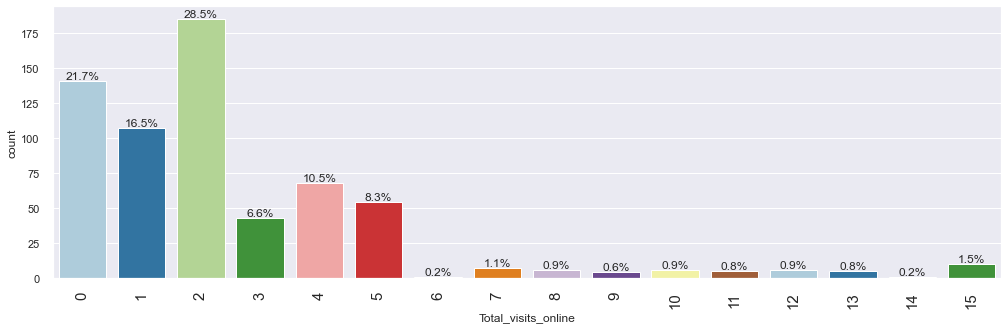

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(df1, "Total_visits_online", perc=True)

<font color=#0e92ea>
    
    
#### 18e. Total Calls Made

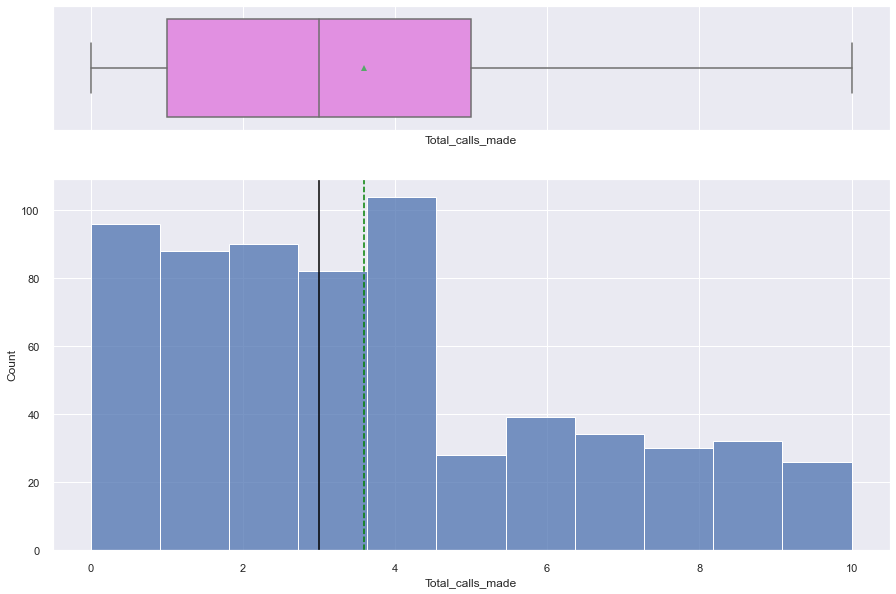

<IPython.core.display.Javascript object>

In [44]:
# 18e
# Please read the observations above for 18e
histogram_boxplot(df1, "Total_calls_made")

In [45]:
# Months Inactive Value Counts (normalized)

df1.Total_calls_made.value_counts(normalize=True)

4    0.16
0    0.15
2    0.14
1    0.14
3    0.13
6    0.06
7    0.05
9    0.05
8    0.05
5    0.04
10   0.04
Name: Total_calls_made, dtype: float64

<IPython.core.display.Javascript object>

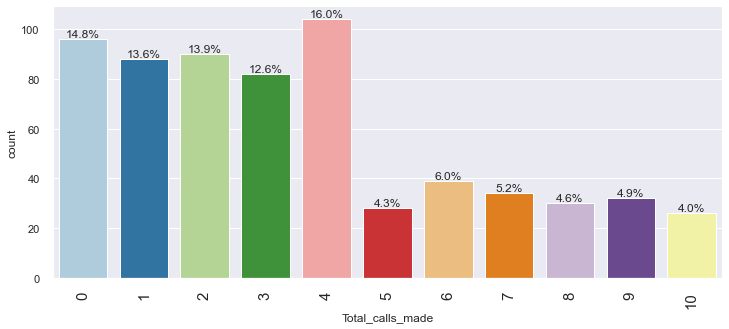

<IPython.core.display.Javascript object>

In [46]:
labeled_barplot(df1, "Total_calls_made", perc=True)

***

<font color=orange>

## 19. Return the pairwise correlation of all columns as well as a heatmap for the dataframe 

###### OBSERVATIONS:
* <span style='color:#0e92ea'>UNRELATED FEATURES:</span> <span style='color:darkblue'>The features in this dataset seem to be unrelated to one another</span>
* <span style='color:#0e92ea'>HIGHEST POSITIVE CORRELATION:</span> <span style='color:darkblue'>0.61 Avg Credit Limit to Total Credit Cards.</span>
* <span style='color:#0e92ea'>HIGHEST NEGATIVE CORRELATION:</span> <span style='color:darkblue'>-0.65 Total Credit Cards to Total Calls Made. </span>

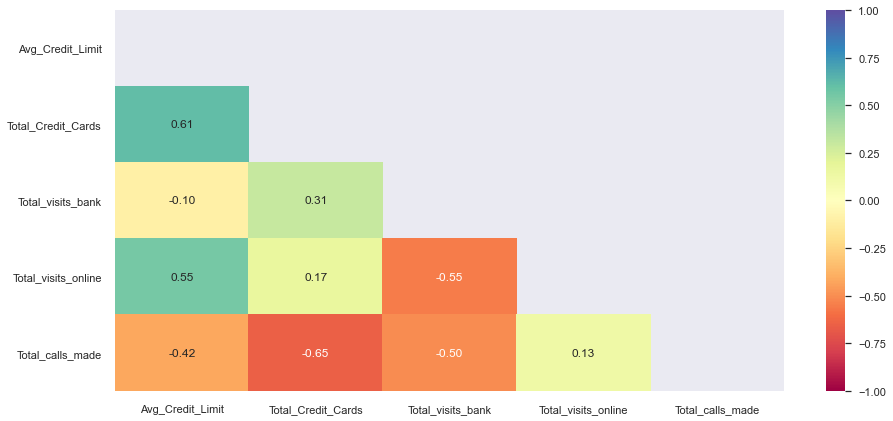

<IPython.core.display.Javascript object>

In [47]:
df1.corr()

plt.figure(figsize=(15, 7))
corr = df1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", mask=mask)
plt.show()

***

<font color=orange>

## 20. Return a pairplot for for the dataframe 

###### OBSERVATIONS:
* <span style='color:#0e92ea'>Average Credit Limit:</span> <span style='color:darkblue'>KDE reveals, perhaps, 3 groupings</span>
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>Total Credit Cards:</span> <span style='color:darkblue'>KDE reveals, perhaps, 4 groupings</span>
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>Total Bank Visits:</span> <span style='color:darkblue'>KDE reveals, perhaps, 6 groupings</span>
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>Total Online Visits:</span> <span style='color:darkblue'>KDE reveals, perhaps, 2-3 groupings</span>
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>Total Calls Made:</span> <span style='color:darkblue'>KDE reveals, perhaps, 2-3 groupings</span>

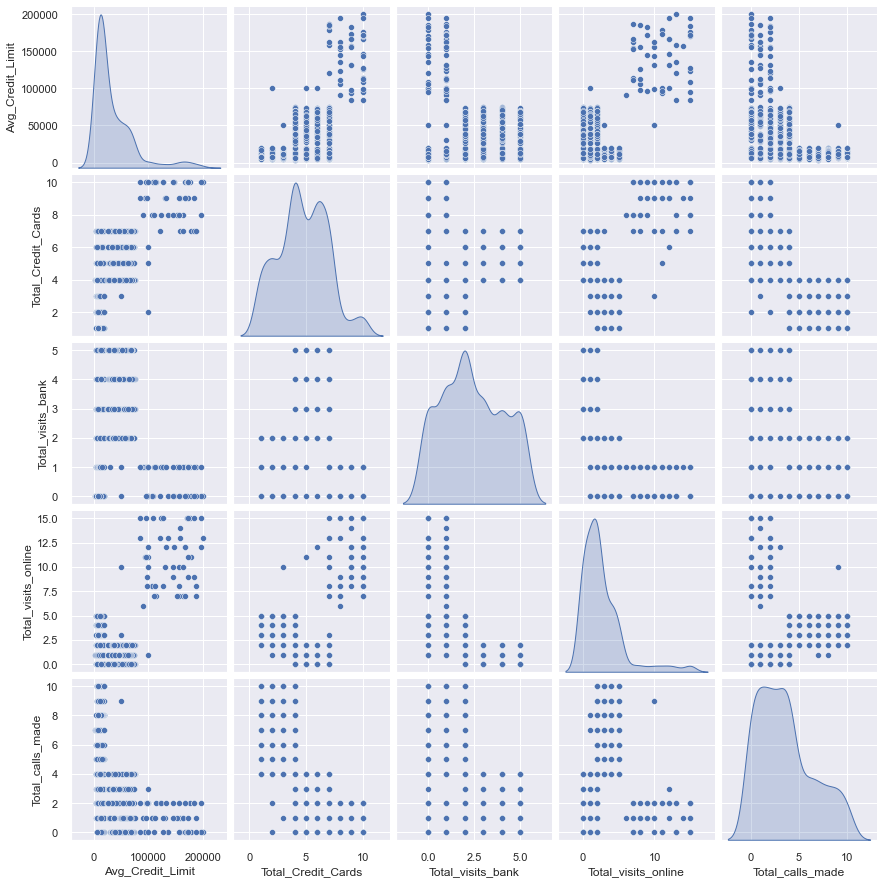

<IPython.core.display.Javascript object>

In [48]:
# Please read observations above
sns.pairplot(data=df1, diag_kind='kde')
plt.show()


***

<font color=orange>

## 21. SCALE THE DATASET (z-score) 

In [49]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df1.copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [50]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=df1.columns)

<IPython.core.display.Javascript object>

In [51]:
subset_scaled_df.head(15)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.72,-1.25,-0.86,-0.55,-1.25
1,0.40,-0.79,-1.48,2.50,1.88
2,0.40,1.05,-0.86,0.13,0.14
3,-0.13,0.13,-0.86,-0.55,0.14
4,1.72,0.59,-1.48,3.18,-0.21
5,-0.39,-0.79,-1.48,-0.55,1.53
6,1.72,0.13,-1.48,2.84,-0.55
7,-0.53,-0.79,-1.48,-0.55,-0.90
8,-0.79,-1.25,-1.48,-0.21,-0.55
9,-0.84,-0.33,-1.48,-0.55,1.19


<IPython.core.display.Javascript object>

***

<font color=orange>

## 22. K-Means Clustering
   Use K-Means clustering to group data based on their attributes. 
   Determine the optimal number of groups/clusters.
    
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>Elbow Method:</span> <span style='color:darkblue'>
    
    The most prominent elbow bend occurs at k=3</span>

Text(0.5, 1.0, 'SELECTING K WITH THE ELBOW METHOD')

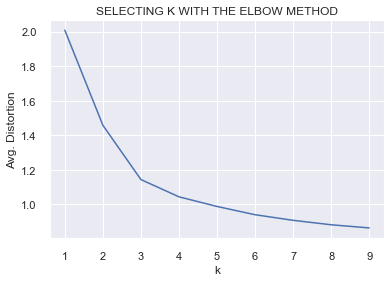

<IPython.core.display.Javascript object>

In [52]:
from sklearn.cluster import KMeans

# Finding the number of clusters
from scipy.spatial.distance import cdist

clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    meanDistortions.append(
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Avg. Distortion")
plt.title("SELECTING K WITH THE ELBOW METHOD")

***

<font color=orange>

## 23. K-Means Clustering K=3 Model
    
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>Append K3_GROUP attribute into scaled dataframe:</span> <span style='color:darkblue'>append K3_GROUP attribute into nonscaled df1 dataframe (no unique IDs/no duplicates) and into the scaled dataframe</span>
* <span style='color:#0e92ea'>head():</span> <span style='color:darkblue'>Show head() for both the nonscaled dataset and the scaled dataset </span>

In [53]:
# k=3

df1_k3_copy = df1.copy()
subset_scaled_df_k3_copy = subset_scaled_df.copy()

model_k3 = KMeans(n_clusters=3)
model_k3.fit(subset_scaled_df_k3_copy)
prediction = model_k3.predict(subset_scaled_df_k3_copy)

# Append Prediction to a copy of df1 and subset_scaled_df
df1_k3_copy["K3_GROUP"] = prediction
subset_scaled_df_k3_copy["K3_GROUP"] = prediction

df1_k3_copy.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K3_GROUP
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


<IPython.core.display.Javascript object>

In [54]:
subset_scaled_df_k3_copy.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K3_GROUP
0,1.72,-1.25,-0.86,-0.55,-1.25,1
1,0.40,-0.79,-1.48,2.50,1.88,0
2,0.40,1.05,-0.86,0.13,0.14,1
3,-0.13,0.13,-0.86,-0.55,0.14,1
4,1.72,0.59,-1.48,3.18,-0.21,2


<IPython.core.display.Javascript object>

In [55]:
print(df.shape)

print(df1.shape)
print(subset.shape)
print(subset_scaled.shape)
print(subset_scaled_df.shape)

print(df1_k3_copy.shape)
print(subset_scaled_df_k3_copy.shape)

(660, 7)
(649, 5)
(649, 5)
(649, 5)
(649, 5)
(649, 6)
(649, 6)


<IPython.core.display.Javascript object>

In [56]:
model_k3.fit(subset_scaled_df)

KMeans(n_clusters=3)

<IPython.core.display.Javascript object>

In [57]:
## data in cluster distance space
temp_k3 = model_k3.fit_transform(subset_scaled_df)

# distance from each observation to each of the centroids
temp_k3

array([[3.45369615, 2.91350494, 4.71886748],
       [2.59055621, 4.6267004 , 4.53911848],
       [2.55127701, 1.98457503, 3.83502425],
       ...,
       [5.15369079, 4.44617921, 0.7766276 ],
       [7.13132249, 6.55550817, 1.77212751],
       [6.11459063, 5.78742412, 0.92963424]])

<IPython.core.display.Javascript object>

In [58]:
model_k3.labels_

array([1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<IPython.core.display.Javascript object>

In [59]:
# coordinates of centroids that algorithm found
model_k3.cluster_centers_

array([[-0.59914514, -1.05751613, -0.89404374,  0.31757787,  1.14798905],
       [-0.02135383,  0.37279143,  0.66912713, -0.55668304, -0.55571829],
       [ 2.80965645,  1.85591807, -1.10692778,  2.80482959, -0.87288132]])

<IPython.core.display.Javascript object>

***

<font color=orange>

## 24. Inertia and Distortion for k3

### Inertia is the sum of the squared distances between each training instance and its closest centroid.
### Distortion is the average of the euclidean squared distance from the centroid of the respective clusters (objective: minimize distortion).
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>Model_k3 Inertia:</span> <span style='color:darkblue'>
    912.85</span>    
* <span style='color:#0e92ea'>Model_k3 Distortion:</span> <span style='color:darkblue'>
    1.14</span>     
* <span style='color:#0e92ea'>Elbow Method:</span> <span style='color:darkblue'>
    
    Using the elbow method again, the most prominent elbow bend occurs at k=3,
    
    However I will also use k=4 for comparison.</span>

In [60]:
temp_k3[np.arange(len(temp_k3)), model_k3.labels_]

array([2.91350494, 2.59055621, 1.98457503, 1.70184226, 1.86876765,
       1.16476801, 2.09392106, 2.31697106, 1.89339387, 1.29939595,
       1.24408023, 0.83321024, 1.27299111, 0.87453983, 0.77648989,
       0.79178471, 1.15467071, 1.19782917, 0.8601572 , 0.9768409 ,
       1.0963498 , 0.65005955, 0.82538516, 1.21574302, 1.35504113,
       1.36130907, 1.09447085, 1.38320663, 0.72802133, 0.95391382,
       1.15461544, 0.63987569, 1.48162951, 1.05138166, 1.3240344 ,
       1.20007532, 1.12804243, 0.71356361, 1.31942439, 1.01031939,
       1.32802548, 0.84167686, 1.41886913, 1.20430536, 1.18826372,
       1.04772399, 1.26221439, 1.10500609, 1.15308746, 0.93435984,
       1.2399481 , 0.85717092, 0.66284245, 1.09330465, 0.96800738,
       1.47040904, 1.22530826, 1.36044741, 0.89022508, 1.06186889,
       0.77557015, 1.29798642, 1.44540003, 0.7299833 , 1.23980112,
       1.21101179, 0.73440081, 1.15737882, 1.43312858, 0.96110633,
       0.93256735, 0.89636462, 0.67196696, 0.48858611, 0.88360

<IPython.core.display.Javascript object>

In [61]:
# inertia is the sum of the squared distances between each training instance and its closest centroid

print(model_k3.inertia_)
np.sum(temp_k3[np.arange(len(temp_k3)), model_k3.labels_] ** 2)

912.8580768587267


912.8580768587269

<IPython.core.display.Javascript object>

In [62]:
cdist(subset_scaled_df, model_k3.cluster_centers_, "euclidean")

array([[3.45369615, 2.91350494, 4.71886748],
       [2.59055621, 4.6267004 , 4.53911848],
       [2.55127701, 1.98457503, 3.83502425],
       ...,
       [5.15369079, 4.44617921, 0.7766276 ],
       [7.13132249, 6.55550817, 1.77212751],
       [6.11459063, 5.78742412, 0.92963424]])

<IPython.core.display.Javascript object>

In [63]:
np.min(cdist(subset_scaled_df, model_k3.cluster_centers_, "euclidean"), axis=1)

array([2.91350494, 2.59055621, 1.98457503, 1.70184226, 1.86876765,
       1.16476801, 2.09392106, 2.31697106, 1.89339387, 1.29939595,
       1.24408023, 0.83321024, 1.27299111, 0.87453983, 0.77648989,
       0.79178471, 1.15467071, 1.19782917, 0.8601572 , 0.9768409 ,
       1.0963498 , 0.65005955, 0.82538516, 1.21574302, 1.35504113,
       1.36130907, 1.09447085, 1.38320663, 0.72802133, 0.95391382,
       1.15461544, 0.63987569, 1.48162951, 1.05138166, 1.3240344 ,
       1.20007532, 1.12804243, 0.71356361, 1.31942439, 1.01031939,
       1.32802548, 0.84167686, 1.41886913, 1.20430536, 1.18826372,
       1.04772399, 1.26221439, 1.10500609, 1.15308746, 0.93435984,
       1.2399481 , 0.85717092, 0.66284245, 1.09330465, 0.96800738,
       1.47040904, 1.22530826, 1.36044741, 0.89022508, 1.06186889,
       0.77557015, 1.29798642, 1.44540003, 0.7299833 , 1.23980112,
       1.21101179, 0.73440081, 1.15737882, 1.43312858, 0.96110633,
       0.93256735, 0.89636462, 0.67196696, 0.48858611, 0.88360

<IPython.core.display.Javascript object>

In [64]:
# Distortion

sum(
    np.min(cdist(subset_scaled_df, model_k3.cluster_centers_, "euclidean"), axis=1)
) / subset_scaled_df.shape[0]

1.1434401208195095

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 2.007896349270688
Number of Clusters: 2 	Average Distortion: 1.4576197022077821
Number of Clusters: 3 	Average Distortion: 1.1434401208195095
Number of Clusters: 4 	Average Distortion: 1.0435538595477063
Number of Clusters: 5 	Average Distortion: 0.9878639809950909
Number of Clusters: 6 	Average Distortion: 0.9402321120333815
Number of Clusters: 7 	Average Distortion: 0.9070102411949061
Number of Clusters: 8 	Average Distortion: 0.8881960603199192


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

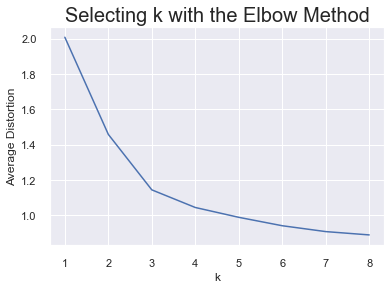

<IPython.core.display.Javascript object>

In [65]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(
                cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1,
            )
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

***

<font color=orange>

## 25. K=3 GROUP DISTRIBUTIONS
    
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>MEAN AGGREGATION:</span> <span style='color:darkblue'>Average numeric value for each SCALED feature/attribute</span>
* <span style='color:#0e92ea'>MEAN AGGREGATION:</span> <span style='color:darkblue'>Average numeric value for each UNSCALED feature/attribute</span>
    
    
* <span style='color:#0e92ea'>Average Credit Limit:</span> <span style='color:darkblue'>HIGHEST: GROUP 0; LOWEST: GROUP 2</span>
* <span style='color:#0e92ea'>Total Cedit Cards:</span> <span style='color:darkblue'>HIGHEST: GROUP 0; LOWEST: GROUP 2</span>
* <span style='color:#0e92ea'>Total Bank Visits:</span> <span style='color:darkblue'>HIGHEST: GROUP 1; LOWEST: GROUP 0</span>
* <span style='color:#0e92ea'>Total Online Visits:</span> <span style='color:darkblue'>HIGHEST: GROUP 0; LOWEST: GROUP 1</span>
* <span style='color:#0e92ea'>Total Calls Made:</span> <span style='color:darkblue'>HIGHEST: GROUP 2; LOWEST: GROUP 0</span>
           
    
* <span style='color:#0e92ea'>GROUP 0:</span> <span style='color:darkblue'>Highest Credit Limit; Does not tend to physically visit bank; does tend to not telephone bank; tends to bank online</span>
* <span style='color:#0e92ea'>GROUP 1:</span> <span style='color:darkblue'>Tends to physically visit bank; does not tend to bank online</span>
* <span style='color:#0e92ea'>GROUP 2:</span> <span style='color:darkblue'>Lowest Credit Limit; Holds fewest credit cards; Tends to telephone bank</span>

In [66]:
# K3 SCALED PROFILE

# NOTE: K3_GROUP labels were already added to a COPY of the scaled dataframe (above)

k3_allLifeCluster_scaled_df = subset_scaled_df_k3_copy.groupby(["K3_GROUP"])
k3_allLifeCluster_scaled_df.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K3_GROUP,,,,,
0,-0.60,-1.06,-0.89,0.32,1.15
1,-0.02,0.37,0.67,-0.56,-0.56
2,2.81,1.86,-1.11,2.80,-0.87


<IPython.core.display.Javascript object>

In [67]:
# K3 NONSCALED PROFILE

# NOTE: K3_GROUP labels were already added to a COPY of the original dataframe, the df1 without duplicates (above)

k3_allLifeCluster_nonscaled_df = df1_k3_copy.groupby(["K3_GROUP"])
k3_allLifeCluster_nonscaled_df.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K3_GROUP,,,,,
0,12239.82,2.41,0.95,3.56,6.89
1,34071.43,5.52,3.48,0.98,1.99
2,141040.00,8.74,0.60,10.90,1.08


<IPython.core.display.Javascript object>

***

<font color=orange>

## 26. K=3 BOXPLOTS grouped by GROUP
    
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>Average Credit Limit:</span> 
<font color=darkblue>  
<span style='color:darkblue'>
    
    Group 0 is 3 standard deviations higher than the mean; 
    
    Group 2 is lower than the mean with a small IQR and one outlier.</span>
    
    
* <span style='color:#0e92ea'>Total Credit Cards:</span> <span style='color:darkblue'>
<font color=darkblue>  
    <span style='color:darkblue'>
    
    Group 0 is 2 standard deviations above the mean; 
    
    Group 2 is over 1 standard deviation below the mean.</span>
    
    
* <span style='color:#0e92ea'>Total Bank Visits:</span> <span style='color:darkblue'>
<font color=darkblue>  
    <span style='color:darkblue'>
    
    Group 0 and Group 2 are both about 1 standard deviations below the mean; 
    
    Group 1 is about 1 standard deviation above the mean.</span>
    
    
* <span style='color:#0e92ea'>Total Online Visits:</span> <span style='color:darkblue'>
<font color=darkblue>  
    <span style='color:darkblue'>
    
    Group 0 is almost 3 standard deviations above the mean; 
    
    Group 2 has an outlier, but is basically average.</span>
    

* <span style='color:#0e92ea'>Total Calls Made:</span> <span style='color:darkblue'>
<font color=darkblue>  
    <span style='color:darkblue'>
    
    Group 2 is 1 standard deviations above the mean; 
    
    Group 0 and Group 1 are below the mean.</span>

array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[K3_GROUP]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[K3_GROUP]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[K3_GROUP]'>],
       [<AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[K3_GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[K3_GROUP]'>,
        <AxesSubplot:>]], dtype=object)

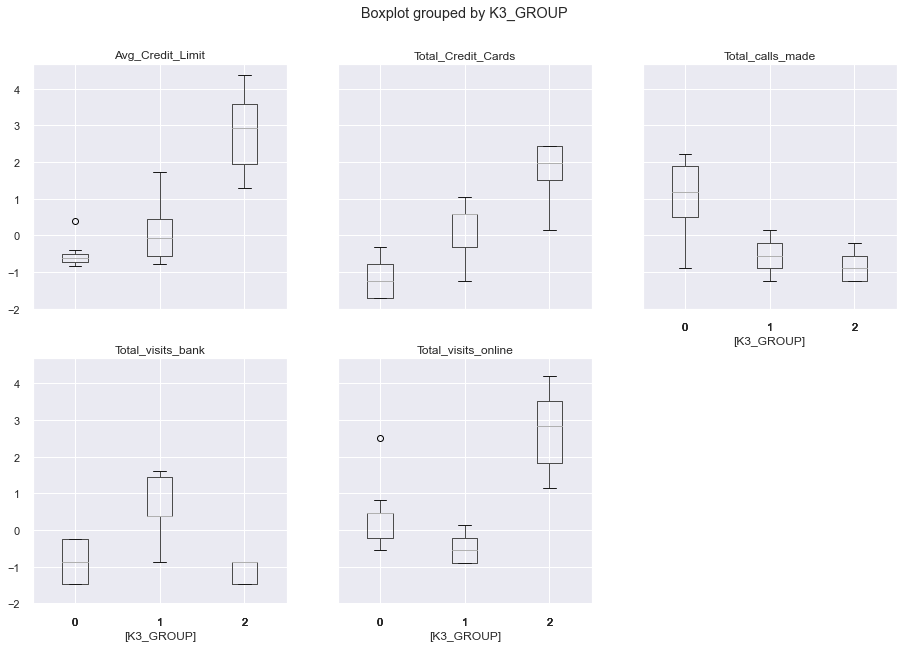

<IPython.core.display.Javascript object>

In [68]:
subset_scaled_df_k3_copy.boxplot(by="K3_GROUP", layout=(2, 3), figsize=(15, 10))

***

<font color=orange>

## 27. K-Means Clustering K=4 Model
    

###### OBSERVATIONS:
* <span style='color:#0e92ea'>Elbow Method:</span> <span style='color:darkblue'>
    
    The most prominent elbow bend occurs at k=3, 
    
    However... **I will use *k=4* for comparison purposes.**</span>


Number of Clusters: 1 	Average Distortion: 2.007896349270688
Number of Clusters: 2 	Average Distortion: 1.4576197022077821
Number of Clusters: 3 	Average Distortion: 1.1434401208195095
Number of Clusters: 4 	Average Distortion: 1.0435538595477063
Number of Clusters: 5 	Average Distortion: 0.9878677336058027
Number of Clusters: 6 	Average Distortion: 0.9399017954938297
Number of Clusters: 7 	Average Distortion: 0.9071227451685151
Number of Clusters: 8 	Average Distortion: 0.8872417129484236


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

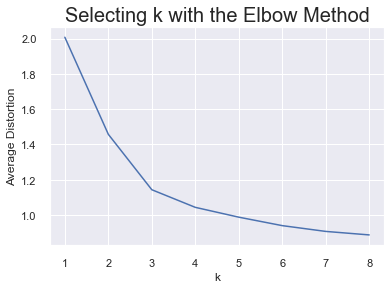

<IPython.core.display.Javascript object>

In [69]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(
                cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1,
            )
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

###### OBSERVATIONS:
* <span style='color:#0e92ea'>Elbow Method:</span> <span style='color:darkblue'>
    
    The most prominent elbow bend occurs at k=3, 
    
    However... **I will use *k=4* for comparison purposes.**</span>

***

<font color=orange>

## 28. K-Means Clustering K=4 Model
    
    


    
    
    
###### OBSERVATIONS:
    
* <span style='color:#0e92ea'>Append K4_LABEL attribute into scaled dataframe:</span> <span style='color:darkblue'>append K4_LABEL attribute into nonscaled df1 dataframe (no unique IDs/no duplicates) and into the scaled dataframe</span>
* <span style='color:#0e92ea'>head():</span> <span style='color:darkblue'>Show head() for both the nonscaled dataset and the scaled dataset </span>

In [70]:
# k=4

df1_k4_copy = df1.copy()
subset_scaled_df_k4_copy = subset_scaled_df.copy()


model_k4 = KMeans(4)
model_k4.fit(subset_scaled_df_k4_copy)
prediction = model_k4.predict(subset_scaled_df_k4_copy)

# Append Prediction
df1_k4_copy["K4_LABEL"] = prediction
subset_scaled_df_k4_copy["K4_LABEL"] = prediction
df1_k4_copy.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K4_LABEL
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,3


<IPython.core.display.Javascript object>

In [71]:
subset_scaled_df_k4_copy.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K4_LABEL
0,1.72,-1.25,-0.86,-0.55,-1.25,0
1,0.40,-0.79,-1.48,2.50,1.88,1
2,0.40,1.05,-0.86,0.13,0.14,0
3,-0.13,0.13,-0.86,-0.55,0.14,0
4,1.72,0.59,-1.48,3.18,-0.21,3


<IPython.core.display.Javascript object>

In [72]:
print(df.shape)

print(df1.shape)
print(subset.shape)
print(subset_scaled.shape)
print(subset_scaled_df.shape)

print(df1_k3_copy.shape)
print(subset_scaled_df_k3_copy.shape)

print(df1_k4_copy.shape)
print(subset_scaled_df_k4_copy.shape)

(660, 7)
(649, 5)
(649, 5)
(649, 5)
(649, 5)
(649, 6)
(649, 6)
(649, 6)
(649, 6)


<IPython.core.display.Javascript object>

In [73]:
model_k4.fit(subset_scaled_df)

KMeans(n_clusters=4)

<IPython.core.display.Javascript object>

In [74]:
## data in cluster distance space
temp_k4 = model_k4.fit_transform(subset_scaled_df)

# distance from each observation to each of the centroids
temp_k4

array([[3.3105823 , 3.46818552, 4.71886748, 2.61872852],
       [4.95784649, 2.57937205, 4.53911848, 4.36014381],
       [2.52415457, 2.56589636, 3.83502425, 1.53599059],
       ...,
       [4.73759576, 5.16262379, 0.7766276 , 4.24319932],
       [6.76180322, 7.13765509, 1.77212751, 6.41580687],
       [6.08540422, 6.12013671, 0.92963424, 5.55877409]])

<IPython.core.display.Javascript object>

In [75]:
model_k4.labels_

array([3, 1, 3, 3, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3,
       3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3,
       0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,

<IPython.core.display.Javascript object>

In [76]:
# coordinates of centroids that algo found
model_k4.cluster_centers_

array([[-0.08061068,  0.35555574,  1.30302675, -0.54857492, -0.573635  ],
       [-0.5993006 , -1.06546668, -0.89732867,  0.32485868,  1.16661114],
       [ 2.80965645,  1.85591807, -1.10692778,  2.80482959, -0.87288132],
       [ 0.02590655,  0.37601031,  0.05053107, -0.55905261, -0.53344229]])

<IPython.core.display.Javascript object>

***

<font color=orange>

## 29. Inertia and Distortion for k4

### Inertia is the sum of the squared distances between each training instance and its closest centroid.
### Distortion is the average of the euclidean squared distance from the centroid of the respective clusters (objective: minimize distortion).
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>Model_k4 Inertia:</span> <span style='color:darkblue'>
    763.72</span>    
* <span style='color:#0e92ea'>Model_k4 Distortion:</span> <span style='color:darkblue'>
    1.04</span>     
* <span style='color:#0e92ea'>Elbow Method:</span> <span style='color:darkblue'>
    
    Using the elbow method again, the most prominent elbow bend occurs at k=3,
    
    However I will also use k=4 for comparison.</span>

In [77]:
temp_k4[np.arange(len(temp_k4)), model_k4.labels_]

array([2.61872852, 2.57937205, 1.53599059, 1.17036015, 1.86876765,
       1.16446717, 2.09392106, 2.03054271, 1.91038443, 1.30685165,
       1.25434721, 0.83755431, 1.25717538, 0.8715477 , 0.78357441,
       0.78231311, 1.17308058, 1.21186214, 0.86480213, 0.9721806 ,
       1.10831578, 0.64622308, 0.8383964 , 1.22824247, 1.34058885,
       1.34022626, 1.07909265, 1.37200667, 0.73004633, 0.95635704,
       1.16983502, 0.64720487, 1.46086466, 1.04699128, 1.31448128,
       1.21208553, 1.11131729, 0.71569851, 1.30985335, 0.996482  ,
       1.32123541, 0.8396771 , 1.33598105, 1.21627718, 1.20443214,
       1.03951197, 1.27268621, 1.11116222, 1.15376787, 0.94938788,
       1.2204015 , 0.8658896 , 0.64468545, 1.0778831 , 0.94932124,
       1.48378145, 1.23281877, 1.34604707, 0.88046247, 1.05378663,
       0.78123028, 1.28826055, 1.45622326, 0.73703659, 1.22024879,
       1.22156478, 0.73982935, 1.17265267, 1.41625983, 0.95893481,
       0.92764647, 0.90485432, 0.68976676, 0.50802135, 0.86768

<IPython.core.display.Javascript object>

In [78]:
# inertia is the sum of the squared distances between each training instance and its closest centroid

print(model_k4.inertia_)
np.sum(temp_k4[np.arange(len(temp_k4)), model_k4.labels_] ** 2)

763.7267173524409


763.7267173524409

<IPython.core.display.Javascript object>

In [79]:
cdist(subset_scaled_df, model_k4.cluster_centers_, "euclidean")

array([[3.3105823 , 3.46818552, 4.71886748, 2.61872852],
       [4.95784649, 2.57937205, 4.53911848, 4.36014381],
       [2.52415457, 2.56589636, 3.83502425, 1.53599059],
       ...,
       [4.73759576, 5.16262379, 0.7766276 , 4.24319932],
       [6.76180322, 7.13765509, 1.77212751, 6.41580687],
       [6.08540422, 6.12013671, 0.92963424, 5.55877409]])

<IPython.core.display.Javascript object>

In [80]:
np.min(cdist(subset_scaled_df, model_k4.cluster_centers_, "euclidean"), axis=1)

array([2.61872852, 2.57937205, 1.53599059, 1.17036015, 1.86876765,
       1.16446717, 2.09392106, 2.03054271, 1.91038443, 1.30685165,
       1.25434721, 0.83755431, 1.25717538, 0.8715477 , 0.78357441,
       0.78231311, 1.17308058, 1.21186214, 0.86480213, 0.9721806 ,
       1.10831578, 0.64622308, 0.8383964 , 1.22824247, 1.34058885,
       1.34022626, 1.07909265, 1.37200667, 0.73004633, 0.95635704,
       1.16983502, 0.64720487, 1.46086466, 1.04699128, 1.31448128,
       1.21208553, 1.11131729, 0.71569851, 1.30985335, 0.996482  ,
       1.32123541, 0.8396771 , 1.33598105, 1.21627718, 1.20443214,
       1.03951197, 1.27268621, 1.11116222, 1.15376787, 0.94938788,
       1.2204015 , 0.8658896 , 0.64468545, 1.0778831 , 0.94932124,
       1.48378145, 1.23281877, 1.34604707, 0.88046247, 1.05378663,
       0.78123028, 1.28826055, 1.45622326, 0.73703659, 1.22024879,
       1.22156478, 0.73982935, 1.17265267, 1.41625983, 0.95893481,
       0.92764647, 0.90485432, 0.68976676, 0.50802135, 0.86768

<IPython.core.display.Javascript object>

In [81]:
sum(
    np.min(cdist(subset_scaled_df, model_k4.cluster_centers_, "euclidean"), axis=1)
) / subset_scaled_df.shape[0]

1.0435538595477063

<IPython.core.display.Javascript object>

***

<font color=orange>

## 30. K=4 GROUP DISTRIBUTIONS
    
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>Mean Aggregation:</span> <span style='color:darkblue'>Average numeric value for each scaled feature/attribute</span>
* <span style='color:#0e92ea'>Mean Aggregation:</span> <span style='color:darkblue'>Average numeric value for each original feature/attribute</span>
    
    
* <span style='color:#0e92ea'>Average Credit Limit:</span> <span style='color:darkblue'>HIGHEST: GROUP 2; LOWEST: GROUP 3</span>
* <span style='color:#0e92ea'>Total Cedit Cards:</span> <span style='color:darkblue'>HIGHEST: GROUP 2; LOWEST: GROUP 3</span>
* <span style='color:#0e92ea'>Total Bank Visits:</span> <span style='color:darkblue'>HIGHEST: GROUP 0; LOWEST: GROUP 2</span>
* <span style='color:#0e92ea'>Total Online Visits:</span> <span style='color:darkblue'>HIGHEST: GROUP 2; LOWEST: GROUP 1</span>
* <span style='color:#0e92ea'>Total Calls Made:</span> <span style='color:darkblue'>HIGHEST: GROUP 3; LOWEST: GROUP 2</span>
           
    
* <span style='color:#0e92ea'>GROUP 0:</span> <span style='color:darkblue'>Highest Total Bank Visits; Average Credit Limit; Extremely low Total Online Visits</span>
* <span style='color:#0e92ea'>GROUP 1:</span> <span style='color:darkblue'>Average Total Bank Visits and Average Credit Limit; </span>
* <span style='color:#0e92ea'>GROUP 2:</span> <span style='color:darkblue'>Highest Credit Limit; Holds most credit cards; Tends not to physically visit bank; tends to bank online</span>
* <span style='color:#0e92ea'>GROUP 3:</span> <span style='color:darkblue'>Highest Total Calls Made; Lowest Credit Limit; Least Amount of Online Visits; Low Physical Visits to Bank.</span>

In [82]:
# K4 SCALED PROFILE

# NOTE: K4_GROUP labels were already added to a COPY of the scaled dataframe (above)

k4_allLifeCluster_scaled_df = subset_scaled_df_k4_copy.groupby(["K4_LABEL"])
k4_allLifeCluster_scaled_df.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K4_LABEL,,,,,
0,0.03,0.38,0.05,-0.56,-0.53
1,-0.60,-1.07,-0.90,0.32,1.17
2,-0.08,0.36,1.30,-0.55,-0.57
3,2.81,1.86,-1.11,2.80,-0.87


<IPython.core.display.Javascript object>

In [83]:
# K4 SCALED PROFILE

# NOTE: K4_GROUP labels were already added to a COPY of the nonscaled dataframe (above)

k4_allLifeCluster_nonscaled_df = df1_k4_copy.groupby(["K4_LABEL"])
k4_allLifeCluster_nonscaled_df.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K4_LABEL,,,,,
0,35857.14,5.53,2.48,0.97,2.06
1,12233.94,2.39,0.94,3.58,6.94
2,31832.43,5.48,4.51,1.01,1.94
3,141040.00,8.74,0.60,10.90,1.08


<IPython.core.display.Javascript object>

***

<font color=orange>

## 31. K=4 BOXPLOTS grouped by GROUP
    
    
###### OBSERVATIONS:
   
* <span style='color:#0e92ea'>Average Credit Limit:</span> <span style='color:darkblue'>
<font color=darkblue>  
    <span style='color:darkblue'>
    
    Group 2 is 3 standard deviations higher than the mean; 
        
    Group 0 is lower than the mean with a small IQR and one outlier.</span>
    
    
* <span style='color:#0e92ea'>Total Credit Cards:</span> <span style='color:darkblue'>
<font color=darkblue>  
    <span style='color:darkblue'>    
        
    Group 2 is 2 standard deviations above the mean; 
        
    Group 0 is over 1 standard deviation below the mean.</span>
    
    
* <span style='color:#0e92ea'>Total Bank Visits:</span> <span style='color:darkblue'>
<font color=darkblue>  
    <span style='color:darkblue'>    
        
    Group 1 is over 1 standard deviation above the mean
        
    Group 3 is average with an outlier below the mean; 
    
    Group 0 and Group 2 are over 1 standard deviation below the mean.</span>
    
    
* <span style='color:#0e92ea'>Total Online Visits:</span> <span style='color:darkblue'>
<font color=darkblue>  
    <span style='color:darkblue'>    
    
    Group 2 is almost 3 standard deviations above the mean; 
        
    Group 0 has an outlier, but is a little over average.</span>
    

* <span style='color:#0e92ea'>Total Calls Made:</span> <span style='color:darkblue'>
<font color=darkblue>  
    <span style='color:darkblue'>    
    
    Group 0 is 1 standard deviations above the mean (the only group; 
        
    Group 0, Group 1, and Group 2 are below the mean.</span>

array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[K4_LABEL]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[K4_LABEL]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[K4_LABEL]'>],
       [<AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[K4_LABEL]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[K4_LABEL]'>,
        <AxesSubplot:>]], dtype=object)

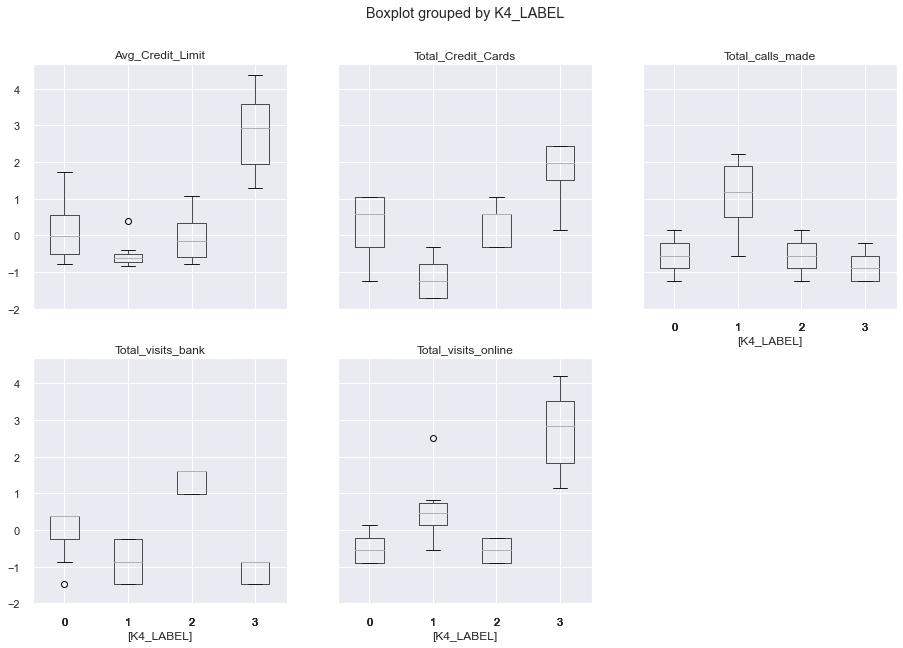

<IPython.core.display.Javascript object>

In [84]:
subset_scaled_df_k4_copy.boxplot(by="K4_LABEL", layout=(2, 3), figsize=(15, 10))

***

<font color=orange>

## 32. Silhouette Scores
    
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>A good K-value based on silhouette scores:</span> <span style='color:darkblue'>k=3 score:0.5162</span>
    
* <span style='color:#0e92ea'>A good K-value based on silhouette scores:</span> <span style='color:darkblue'>k=4 score:0.3570</span>
   


For n_clusters = 2, silhouette score is 0.41800025566689647
For n_clusters = 3, silhouette score is 0.516281010855363
For n_clusters = 4, silhouette score is 0.3570238219413198
For n_clusters = 5, silhouette score is 0.2730908848204728
For n_clusters = 6, silhouette score is 0.2569035285862428
For n_clusters = 7, silhouette score is 0.24890060002152298
For n_clusters = 8, silhouette score is 0.22717313000221975
For n_clusters = 9, silhouette score is 0.22485508555247707


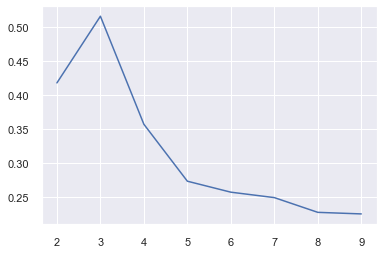

<IPython.core.display.Javascript object>

In [85]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

***

<font color=orange>

## 33. Silhouette Visualizer
    
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>K=3:</span> <span style='color:darkblue'>k=3 has the highest silhouette score, and all of the groups exceed the average silhouette score. It is also easier to interpret 3 groups.</span>
* <span style='color:#0e92ea'>K=4:</span> <span style='color:darkblue'>k=4 has the second-highest silhouette score, and every group exceeds the average silhouette score. It is a little more difficult to interpret 4 groups.</span>

    

* <span style='color:#0e92ea'>BEST K VALUE:</span> <span style='color:darkblue'>Based on Silhouette Score and the Silhouette Visualizer, it appears as if k=3 is the best clustering value. 
    

* <span style='color:#0e92ea'>IMPORTANT NOTE:</span> <span style='color:darkblue'>See **OBSERVATIONS** for the best clustering value, k=3, above: **(number 23 - number 26)**.

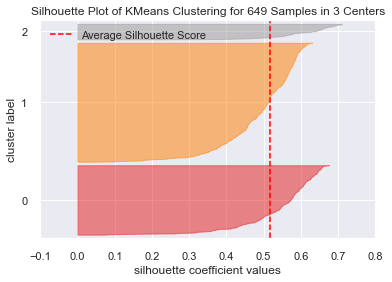

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [86]:
# Plot of KMeans Clustering for 649 data objects within 3 groups

visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

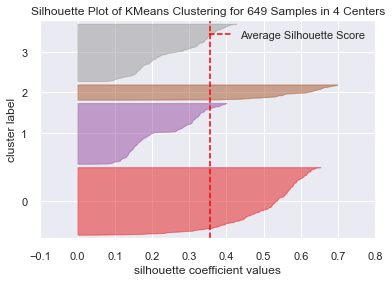

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [87]:
# Plot of KMeans Clustering for 649 data objects within 4 groups

visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

***

<font color=orange>

## 34. Bar Chart of Features based on Grouping
    
    
###### K=3 OBSERVATIONS:
    
* <span style='color:#0e92ea'>**AVERAGE CREDIT LIMIT**:</span> <span style='color:darkblue'>
<font color=darkblue>  
    <span style='color:darkblue'>
    
    Group 2 is almost 3 standard deviations higher than the mean;
        
    Group 0 is average;
        
    Group 1 is 1/2 standard deviation below the mean.</span>    

    * <span style='color:#0e92ea'>**TOTAL CREDIT CARDS**:</span> <span style='color:darkblue'>
<font color=darkblue>  
    <span style='color:darkblue'>
    
    Group 2 is about 3 standard deviations higher than the mean; 
        
    Group 0 is a little above average;
    
    Group 1 is 1 standard deviation below the mean.</span>
    
    * <span style='color:#0e92ea'>**TOTAL BANK VISITS**:</span> <span style='color:darkblue'>
<font color=darkblue>  
    <span style='color:darkblue'>
    
    Group 0 is 0.6 standard deviations above the mean (the only group above the average);
        
    Group 1 is almost 1 standard deviation below the mean; 
        
    Group 2 is over 2 standard deviations below the mean.</span>    

    * <span style='color:#0e92ea'>**TOTAL ONLINE VISITS**:</span> <span style='color:darkblue'>
<font color=darkblue>  
    <span style='color:darkblue'>
        
    Group 2 is almost 3 standard deviations higher than the mean;    
    
    Group 1 is about 1/2 standard deviations above than the mean; 
        
    Group 0 is about 1/2 standard deviation below the mean.</span>
    
    * <span style='color:#0e92ea'>**TOTAL CALLS MADE**:</span> <span style='color:darkblue'>
<font color=darkblue>  
    <span style='color:darkblue'>
    
    Group 1 is over 1 standard deviation above the mean; 
       
    Group 0 is about 1/2 standard deviation below the mean.    
        
    Group 2 is about 1 and 1/2 standard deviation below the mean.</span>
    
    
* <span style='color:#0e92ea'>**Group 0**:</span> <span style='color:darkblue'>Total Visits Online and Total Calls Made are both far below average for this Group 0 cluster.</span>

* <span style='color:#0e92ea'>**Group 1**:</span> <span style='color:darkblue'>Total Calls Made is this cluster's best score, and the only cluster that scores above average for total calls made. Average Credit Limit, Total Credit Cards, and Total Bank Visits are all well below average for this Group 1 cluster.</span>

* <span style='color:#0e92ea'>**Group 2**:</span> <span style='color:darkblue'>Average Credit Limit, Total Credit Cards, and Total Online Visits are all well above average for this Group 2 cluster.</span>
    
###### K=4 OBSERVATIONS:
* <span style='color:#0e92ea'>Group 0:</span> <span style='color:darkblue'>Total Visits Online and Total Calls Made are both far below average for this cluster.</span>
* <span style='color:#0e92ea'>Group 1:</span> <span style='color:darkblue'>Total Calls Made and Total Visits Online are above average for this cluster, however group 1 is below average in Average Credit Limit, Total Credit Cards, and Total Bank Visits.</span>
* <span style='color:#0e92ea'>Group 2:</span> <span style='color:darkblue'>Average Credit Limit, Total Credit Cards, and Total Online Visits are all well above average for this cluster.</span>
* <span style='color:#0e92ea'>Group 3:</span> <span style='color:darkblue'>Total Visits Online, Total Calls Made, and Average are above average for this cluster, while Total Credit Cards is above average. This cluster scores average in Average Credit Limit and Total Bank Visits.</span>

<AxesSubplot:xlabel='K3_GROUP'>

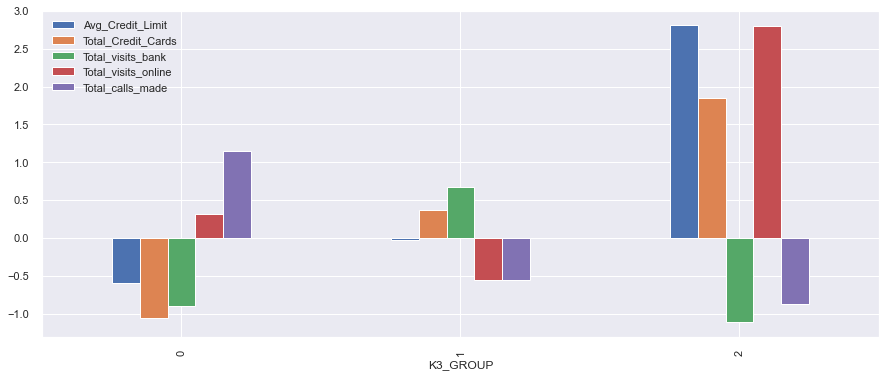

<IPython.core.display.Javascript object>

In [88]:
# K=3 Grouping Features
# K=3 IS THE BEST K VALUE


# NOTE: CLUSTER PROFILING WILL FOLLOW THE COVARIANCE MATRIX SECTION, PCA SECTION, AND DIMENSIIONALITY REDUCTION SECTION (below)


subset_scaled_df_k3_copy.groupby("K3_GROUP").mean().plot.bar(figsize=(15, 6))

<AxesSubplot:xlabel='K4_LABEL'>

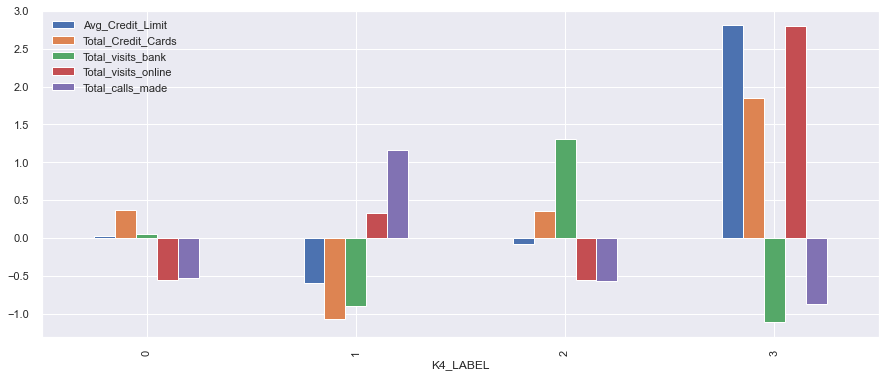

<IPython.core.display.Javascript object>

In [89]:
# K=4 Grouping Features
# K=4 NOT THE BEST K VALUE -- USED HERE FOR COMPARITIVE PURPOSES ONLY

subset_scaled_df_k4_copy.groupby("K4_LABEL").mean().plot.bar(figsize=(15, 6))

***

<font color=orange>

## 35. Covariance Matrix for k=3
    
    
###### OBSERVATIONS:
![alt text](Covariance_Matrix_05.png "Covariance Matrix")

In [90]:
subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.72,-1.25,-0.86,-0.55,-1.25
1,0.40,-0.79,-1.48,2.50,1.88
2,0.40,1.05,-0.86,0.13,0.14
3,-0.13,0.13,-0.86,-0.55,0.14
4,1.72,0.59,-1.48,3.18,-0.21


<IPython.core.display.Javascript object>

In [91]:
covMatrix = np.cov(subset_scaled, rowvar=False)
print(covMatrix)

[[ 1.00154321  0.61356862 -0.09931042  0.55379403 -0.41899616]
 [ 0.61356862  1.00154321  0.31200444  0.17022366 -0.65433344]
 [-0.09931042  0.31200444  1.00154321 -0.55493307 -0.50503391]
 [ 0.55379403  0.17022366 -0.55493307  1.00154321  0.12567376]
 [-0.41899616 -0.65433344 -0.50503391  0.12567376  1.00154321]]


<IPython.core.display.Javascript object>

***

<font color=orange>

## 36. Principal Component Analysis PCA
    
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>Features:</span> <span style='color:darkblue'>Per the instructions, I am not required to conduct PCA (because there are only 5 numeric features in my dataset).</span>
   

###### OBSERVATIONS:    
    
    
* <span style='color:#0e92ea'>Eigen Values:</span> <span style='color:darkblue'>Here is a list of the Eigen Values for n_components=5. This list is in descending order.  The highest value is 2.422, which is 10-times larger that the lowest value of 0.2448</span>  
    
    
* <span style='color:#0e92ea'>Eigen Vectors:</span> <span style='color:darkblue'>Here is a list of 5 the Eigen Vectors for n_components=5.</span>

    
###### OBSERVATIONS:    
    
    
* <span style='color:#0e92ea'>**Percentage of Variation Explained**:</span> <span style='color:darkblue'>This list is in descending order.  **Three components explain 92% of the the variation, while two components only explain 8%.**</span>  
    
    
    
* <span style='color:#0e92ea'>Dimensionality:</span> <span style='color:darkblue'>Three dimensions seem more appropriate.</span>  

In [92]:
pca = PCA(n_components=5)
pca.fit(subset_scaled_df)

PCA(n_components=5)

<IPython.core.display.Javascript object>

In [93]:
# Eigen Values (magnitude of PCA variance explained)

print(pca.explained_variance_)

[2.29508344 1.87476409 0.31859806 0.27803604 0.24123441]


<IPython.core.display.Javascript object>

In [94]:
# Eigen Vectors (direction of PCA covariances)

print(pca.components_)

[[ 0.49391363  0.59755995  0.27271417  0.11896394 -0.55717682]
 [ 0.39552609  0.02438958 -0.59097884  0.66416793  0.22932342]
 [-0.01980435 -0.25772238 -0.62783557 -0.30714766 -0.66683564]
 [ 0.3166406  -0.75205386  0.42164697  0.30226515 -0.25495749]
 [-0.70636744  0.10159436  0.06638771  0.59918664 -0.35677958]]


<IPython.core.display.Javascript object>

In [95]:
# Percentage of Variation Explained

print(pca.explained_variance_ratio_)

[0.45830942 0.37437508 0.06362143 0.05552153 0.04817254]


<IPython.core.display.Javascript object>

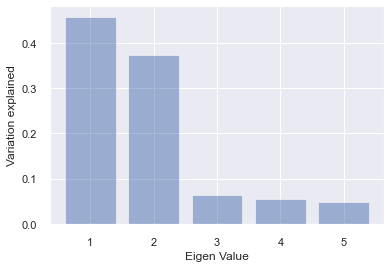

<IPython.core.display.Javascript object>

In [96]:
plt.bar(list(range(1, 6)), pca.explained_variance_ratio_, alpha=0.5, align="center")
plt.ylabel("Variation explained")
plt.xlabel("Eigen Value")
plt.show()

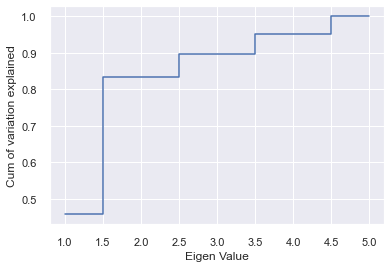

<IPython.core.display.Javascript object>

In [97]:
plt.step(list(range(1, 6)), np.cumsum(pca.explained_variance_ratio_), where="mid")
plt.ylabel("Cum of variation explained")
plt.xlabel("Eigen Value")
plt.show()

***

<font color=orange>

## 37. Dimensionality Reduction
    
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>Feature Extraction:</span> <span style='color:darkblue'>Per the instructions, I am not required to conduct feature extraction (because there are only 5 numeric features in my dataset), but I'm going to try to reduce my dimensions to three (3) based on the above graphs.</span>
    
    
* <span style='color:#0e92ea'>**Percent Variation Explained**:</span> <span style='color:darkblue'>**The new variables are well scattered and account for 37.7%, 31.3%, and 20.2% of Variation in the data.**</span>  
    


In [98]:
# Percent Variation Explained

pca3 = PCA(n_components=3)
pca3.fit(subset_scaled_df)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(subset_scaled_df)

[[ 0.49391363  0.59755995  0.27271417  0.11896394 -0.55717682]
 [ 0.39552609  0.02438958 -0.59097884  0.66416793  0.22932342]
 [-0.01980435 -0.25772238 -0.62783557 -0.30714766 -0.66683564]]
[0.45830942 0.37437508 0.06362143]


<IPython.core.display.Javascript object>

In [99]:
Xpca3

array([[ 0.50147593,  0.50801346,  1.82915127],
       [-1.42586489,  3.10333682, -0.90051938],
       [ 0.52904842,  0.80993242,  0.12635833],
       ...,
       [ 2.86915262,  2.92694707,  0.02899652],
       [ 4.20797334,  4.5028627 , -0.61514968],
       [ 3.19110432,  4.28742709, -0.25873895]])

<IPython.core.display.Javascript object>

In [100]:
# PAIRPLOT OF 3 DIMENSIONS

<IPython.core.display.Javascript object>

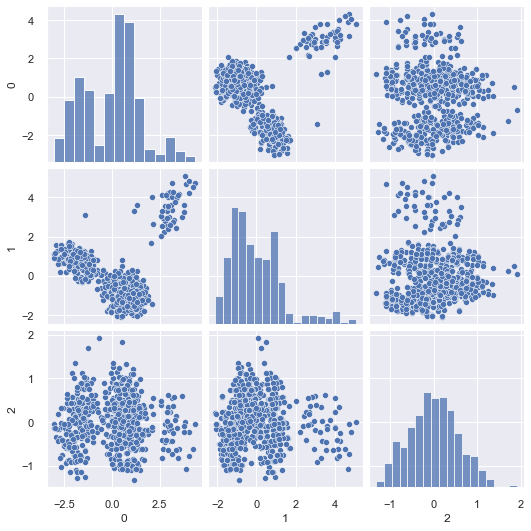

<IPython.core.display.Javascript object>

In [101]:
sns.pairplot(pd.DataFrame(Xpca3))

***

### Check the Shapes

In [102]:
print(df.shape)
print("\n")

print(df1.shape)
print(subset.shape)
print(subset_scaled.shape)
print(subset_scaled_df.shape)
print("\n")

print(df1_k3_copy.shape)
print(subset_scaled_df_k3_copy.shape)
print("\n")

print(df1_k4_copy.shape)
print(subset_scaled_df_k4_copy.shape)

(660, 7)


(649, 5)
(649, 5)
(649, 5)
(649, 5)


(649, 6)
(649, 6)


(649, 6)
(649, 6)


<IPython.core.display.Javascript object>

<font color=orange>

## 38. HIERARCHICAL CLUSTERING (Agglomerative)
    
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>Cophenetic Correlation:</span> <span style='color:darkblue'>HIGHEST COMBINATION: 0.897440 Euclidean Distance and Average Linkage.</span>
 
   

In [103]:
# list of distance metrics
distance_metrics = [
    "euclidean",
    "chebyshev",
    "mahalanobis",
    "cityblock",
]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7395135051413775.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8794736468795109.
Cophenetic correlation for Euclidean distance and average linkage is 0.8974425535306298.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8551098644586315.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7379112982920528.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8578617029322211.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8960370054789858.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.893309534644998.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7054746377393306.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6513369047977687.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8330283182400025.
Cophenetic cor

<IPython.core.display.Javascript object>

In [104]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8974425535306298, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

***

<font color=orange>

## 39. Euclidean Distance with various other linkage methods
    
    
###### OBSERVATIONS:
* <span style='color:#0e92ea'>Cophenetic Correlation:</span> <span style='color:darkblue'>HIGHEST COMBINATION: 0.89744 Euclidean Distance and Average Linkage.</span>

In [105]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7395135051413775.
Cophenetic correlation for complete linkage is 0.8794736468795109.
Cophenetic correlation for average linkage is 0.8974425535306298.
Cophenetic correlation for centroid linkage is 0.894471288720818.
Cophenetic correlation for ward linkage is 0.7425813590948763.
Cophenetic correlation for weighted linkage is 0.8551098644586315.


<IPython.core.display.Javascript object>

In [106]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8974425535306298, which is obtained with average linkage.


<IPython.core.display.Javascript object>

***

<font color=orange>

## 40. Dendrograms


###### OBSERVATIONS:
* <span style='color:#0e92ea'>*SINGLE LINKAGE*:</span> <span style='color:darkblue'>Cophenetic Coefficient: 0.74; Single Linkage graph is not distinct or separate enough to interpret. It's scale is 2.0.</span>
    
    
* <span style='color:#0e92ea'>*COMPLETE LINKAGE*:</span> <span style='color:darkblue'>Cophenetic Coefficient: 0.88; Complete Linkage graph is distinct and separate enough to interpret. It has a scale of 8.0, and appears to show three good groups.</span>
    
    
* <span style='color:#0e92ea'>*AVERAGE LINKAGE* Linkage:</span> <span style='color:darkblue'>Cophenetic Coefficient: 0.90; Average Linkage is fairly distinct and separate. It has a scale of 5.0. It appears to show three groups, but only two colors.</span>
    
    
* <span style='color:#0e92ea'>*CENTROID LINKAGE*:</span> <span style='color:darkblue'>Cophenetic Coefficient: 0.89; Centroid Linkage has the highest cophenetic correlation, and while its scale is 5.0, the graph is only slighly distinct or separate enough to interpret; it appears to show two groups.</span>
    
    
* <span style='color:#0e92ea'>*WARD LINKAGE*:</span> <span style='color:darkblue'>Cophenetic Coefficient: 0.74; Ward Linkage graph is distinct and separate enough to interpret, but it shows a huge height scale up to 50; there are many groups even at 5.</span>
    
    
* <span style='color:#0e92ea'>*WEIGHTED LINKAGE*:</span> <span style='color:darkblue'>Cophenetic Coefficient: 0.86; Weighted Linkage graph is distinct and separate enough to interpret. It is scaled at 5.0, and it shows 3 good groups.</span>
    
###### OBSERVATIONS:    
    
* <span style='color:#0e92ea'>*Weighted Linkage vs. Complete Linkage*:</span> <span style='color:darkblue'>Cophenetic Correlation: 0.86 vs. 0.88; Both show about k=3 groups.</span>

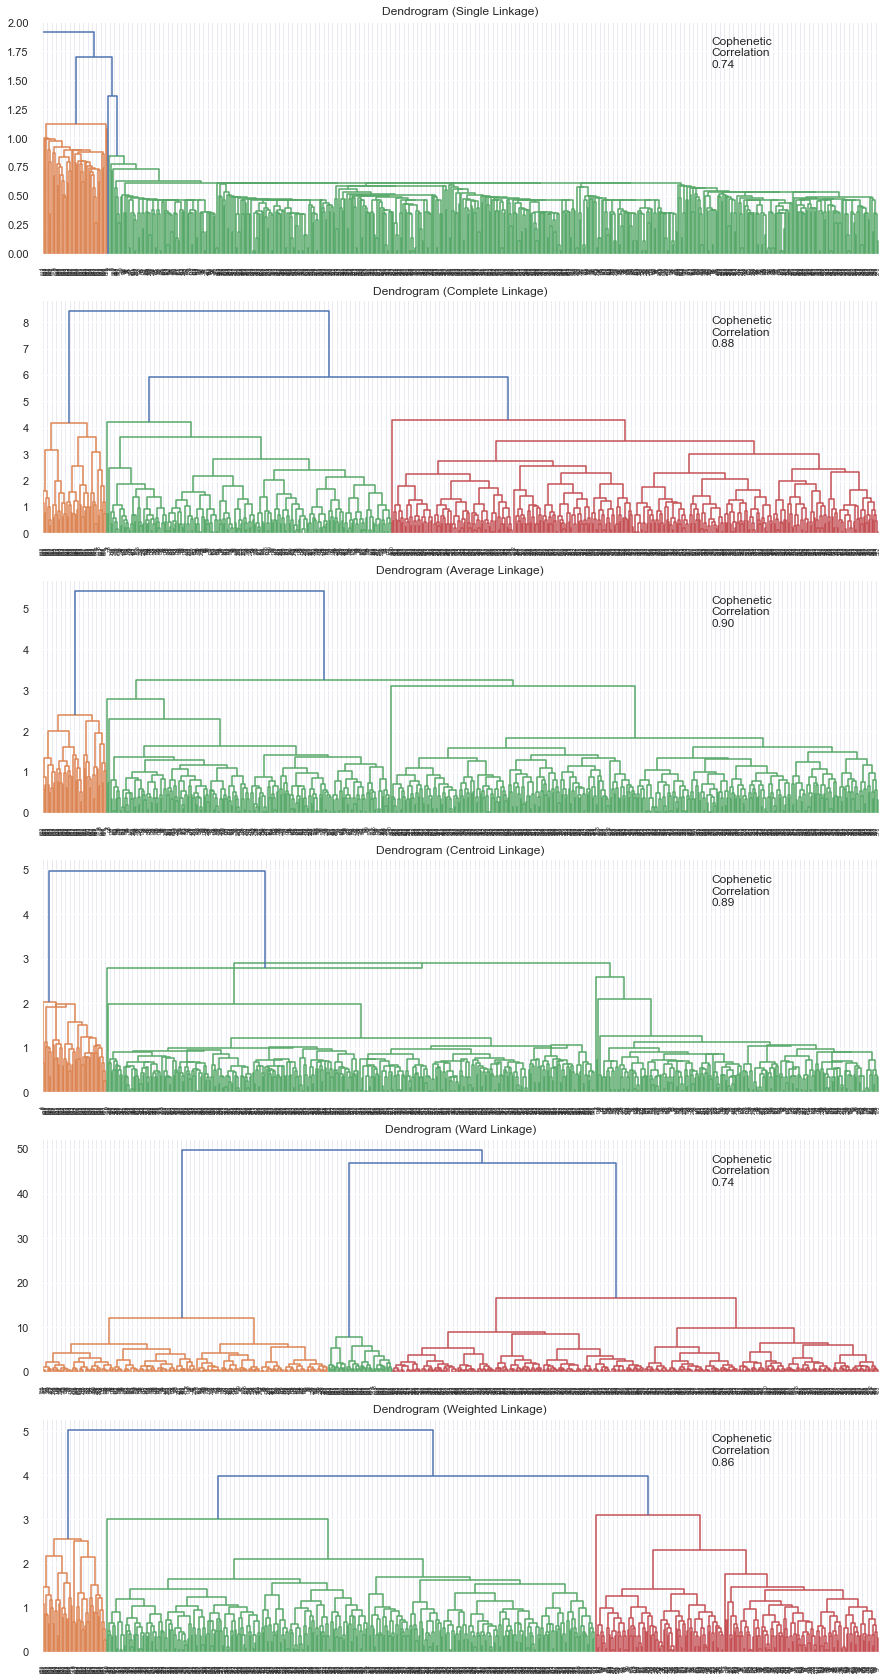

<IPython.core.display.Javascript object>

In [107]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# Enumerate through the list of linkage methods above
# For each linkage method, plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [108]:
# Dataframe to compare cophenetic correlations for each linkage method

# OBSERVATION: The highest cophenetic coefficient is 0.92 (Centroid), however 0.91 (Complete, Average, and Weighted) are also very high.
# OBSERVATION: The best combinations of dendrogram and cophenetic coefficient seem to be Weighted (on a 5.0 scale) and Average (on a 5.0 scale) and Complete (on a scale of 8.0)

df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.74
1,complete,0.88
2,average,0.90
3,centroid,0.89
4,ward,0.74
5,weighted,0.86


<IPython.core.display.Javascript object>

<font color=orange>

## 41. MAHALANOBIS AND MANHATTAN Dendrograms


###### OBSERVATIONS:
* <span style='color:#0e92ea'>Manhattan Distance with Weighted Linkage:</span> <span style='color:darkblue'>Cophenetic Coefficient: 0.88 (the highest of these four combinations); Graph is not too Distinct or separate enough to interpret. The scale is 8.0</span>
        
###### OBSERVATIONS:
* <span style='color:#0e92ea'>BEST COMBINATION:</span> <span style='color:darkblue'>None of these seem to be optimal for this exercise, however the Manhattan Distance with Complete Linkage appears to show 3 good groups but on a 17.5 scale.</span>

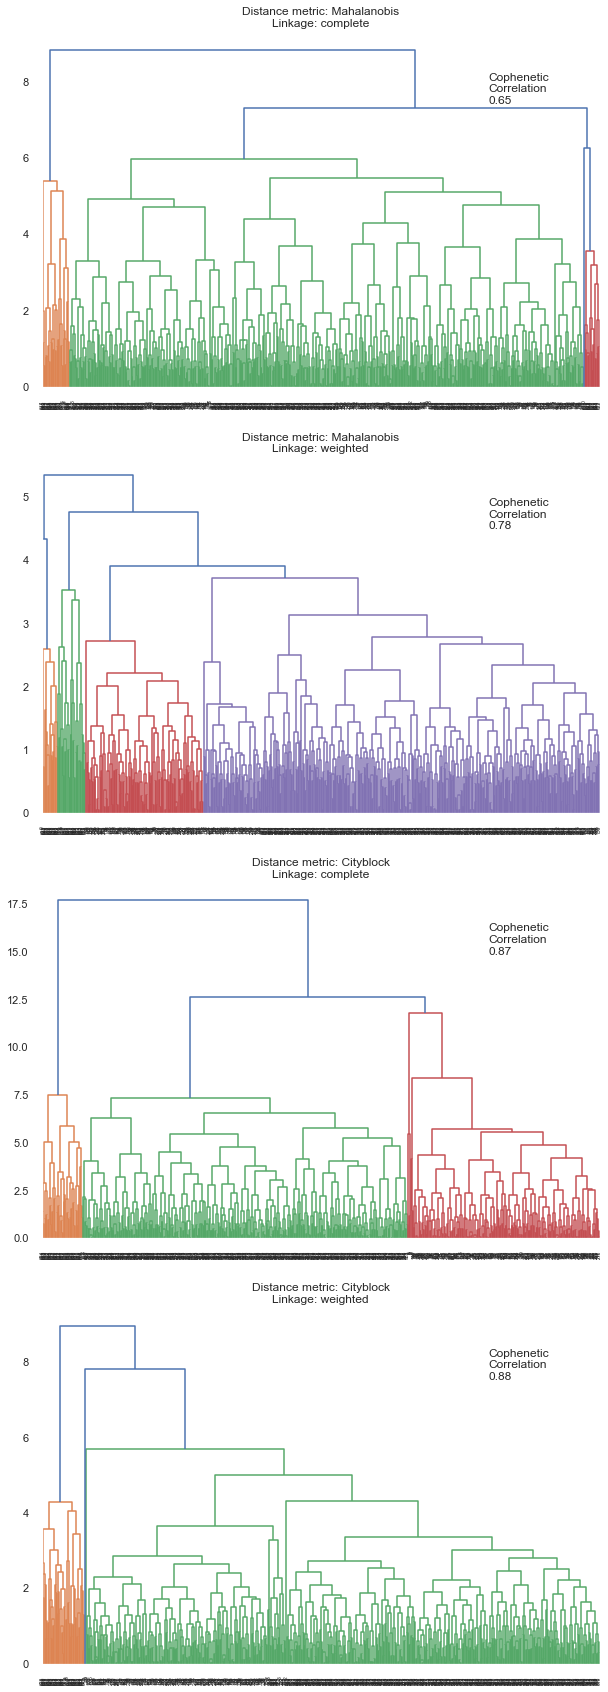

<IPython.core.display.Javascript object>

In [109]:
# DENDROGRAM FOR MAHALANOBIS AND MANHATTAN DISTANCES (WITH COMPLETE LINKAGE and WEIGHTED LINKAGE)

# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["complete", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

***

<font color=orange>

## 42. BUILD AN AGGLOMERATIVE MODEL WITH 3 CLUSTERS using EUCLIDEAN DISTANCE AND COMPLETE LINKAGE
    

###### OBSERVATIONS:
    
* <span style='color:#0e92ea'>Hierarchical Clustering Labels:</span> <span style='color:darkblue'>Label the scaled and original datasets with HC_Cluster_Labels for Euclidean Distance with Weighted Linkage</span>

In [110]:
print(df.shape)
print("\n")

print(df1.shape)
print(subset.shape)
print(subset_scaled.shape)
print(subset_scaled_df.shape)
print("\n")

print(df1_k3_copy.shape)
print(subset_scaled_df_k3_copy.shape)
print("\n")

print(df1_k4_copy.shape)
print(subset_scaled_df_k4_copy.shape)

(660, 7)


(649, 5)
(649, 5)
(649, 5)
(649, 5)


(649, 6)
(649, 6)


(649, 6)
(649, 6)


<IPython.core.display.Javascript object>

In [111]:
HCmodel = AgglomerativeClustering(
    n_clusters=3, affinity="euclidean", linkage="complete"
)


<IPython.core.display.Javascript object>

In [112]:
print(HCmodel.fit(subset_scaled_df))
print(HCmodel.fit(df1))

AgglomerativeClustering(linkage='complete', n_clusters=3)
AgglomerativeClustering(linkage='complete', n_clusters=3)


<IPython.core.display.Javascript object>

In [113]:
# adding hierarchical cluster labels to the scaled and original dataframes
subset_scaled_df["HC_Cluster_Labels"] = HCmodel.labels_
df1["HC_Cluster_Labels"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [114]:
subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Cluster_Labels
0,1.72,-1.25,-0.86,-0.55,-1.25,0
1,0.40,-0.79,-1.48,2.50,1.88,2
2,0.40,1.05,-0.86,0.13,0.14,2
3,-0.13,0.13,-0.86,-0.55,0.14,2
4,1.72,0.59,-1.48,3.18,-0.21,0


<IPython.core.display.Javascript object>

In [115]:
df1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Cluster_Labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,2
3,30000,5,1,1,4,2
4,100000,6,0,12,3,0


<IPython.core.display.Javascript object>

***

<font color=orange>

## 43. CLUSTER PROFILING
    

###### OBSERVATIONS:
    
* <span style='color:#0e92ea'>**Hierarchical Clustering Labels**:</span> <span style='color:darkblue'>Label the scaled and original datasets with HC_Cluster_Labels and highlight the max and min values.</span>
    

* <span style='color:#0e92ea'>**Maximum Profile Values**:</span> <span style='color:darkblue'>Hierarchical Cluster Label 1 dominates the Average Credit Limit, Total Credit Cards, and Total Visits Online, however there are only 27 data objects of this label-type.</span>
    
    
* <span style='color:#0e92ea'>**Minimum Profile Values**:</span> <span style='color:darkblue'>Hierarchical Cluster Label 2 is lackluster in Average Credit Limit, Total Credit Cards, and Total Visits Online, and there are there 507 data objects of this label-type.</span>    

In [116]:
df_cluster_profile = df1.groupby("HC_Cluster_Labels").mean()

<IPython.core.display.Javascript object>

In [117]:
df_cluster_profile["Count_for_Each_Cluster"] = (
    df1.groupby("HC_Cluster_Labels")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [118]:
# Cluster profiles (highlight the max values)
df_cluster_profile.style.highlight_max(color="lightblue", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_for_Each_Cluster
HC_Cluster_Labels,,,,,,
0,73982.608696,6.191304,2.704348,2.878261,1.843478,115
1,169148.148148,8.666667,0.555556,10.851852,0.962963,27
2,18857.988166,4.161736,2.426036,2.128205,4.126233,507


<IPython.core.display.Javascript object>

In [119]:
# Cluster profiles (highlight the min values)
df_cluster_profile.style.highlight_min(color="pink", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_for_Each_Cluster
HC_Cluster_Labels,,,,,,
0,73982.608696,6.191304,2.704348,2.878261,1.843478,115
1,169148.148148,8.666667,0.555556,10.851852,0.962963,27
2,18857.988166,4.161736,2.426036,2.128205,4.126233,507


<IPython.core.display.Javascript object>

In [120]:
#  Average Credit Limit in each cluster

# OBSERVATION:
# Cluster 1 has a higher credit limit overall and less unique values because there are only 27 objects of this type.

for cl in df1["HC_Cluster_Labels"].unique():
    print("In cluster {}, the following credit limits are present:".format(cl))
    print(df1[df1["HC_Cluster_Labels"] == cl]["Avg_Credit_Limit"].unique())
    print()

In cluster 0, the following credit limits are present:
[100000  73000  67000  61000  75000  56000  72000  70000  69000  65000
  74000  58000  71000  59000  64000  54000  66000  57000  63000  68000
  62000  60000  55000  94000 131000  96000 136000 121000 108000  91000
  84000 106000 114000 126000 123000  97000  98000 127000 111000 112000
 132000  95000  99000]

In cluster 2, the following credit limits are present:
[50000 30000 20000 15000  5000  3000 10000 13000 11000  9000  6000  8000
 19000 16000 18000 17000 14000 12000  7000 49000 48000 51000 40000 44000
 31000 37000 46000 39000 52000 33000 47000 41000 45000 27000 43000 36000
 25000 26000 38000 35000 34000 28000 29000 42000 32000]

In cluster 1, the following credit limits are present:
[157000 163000 158000 166000 176000 178000 156000 146000 155000 200000
 195000 187000 173000 153000 184000 144000 171000 186000 183000 172000
 145000 167000]



<IPython.core.display.Javascript object>

In [121]:
#  Total Credit Cards in each cluster

# No one in Cluster 2 has 8, 9, or 10 credit cards; they all have 7 or less.

for cl in df1["HC_Cluster_Labels"].unique():
    print("In cluster {}, the following total credit cards are present:".format(cl))
    print(df1[df1["HC_Cluster_Labels"] == cl]["Total_Credit_Cards"].unique())
    print()

In cluster 0, the following total credit cards are present:
[ 2  6  5  7  4  9 10  8]

In cluster 2, the following total credit cards are present:
[3 7 5 2 4 1 6]

In cluster 1, the following total credit cards are present:
[ 9  8  7 10]



<IPython.core.display.Javascript object>

In [122]:
#  Total Bank Visits in each cluster

# The Cluster with the highest online visits and highest credit limit also have the lowest physical bank visits.

for cl in df1["HC_Cluster_Labels"].unique():
    print("In cluster {}, the following total bank visits are present:".format(cl))
    print(df1[df1["HC_Cluster_Labels"] == cl]["Total_visits_bank"].unique())
    print()

In cluster 0, the following total bank visits are present:
[1 0 4 2 3 5]

In cluster 2, the following total bank visits are present:
[0 1 2 5 3 4]

In cluster 1, the following total bank visits are present:
[1 0]



<IPython.core.display.Javascript object>

In [123]:
#  Total Online Visits in each cluster

# Cluster 2 (507 data objects) has obvious low online visits;
# There is a outlier, however overall this is a troubling discovery in today's digital era.

for cl in df1["HC_Cluster_Labels"].unique():
    print("In cluster {}, the following total online visits are present:".format(cl))
    print(df1[df1["HC_Cluster_Labels"] == cl]["Total_visits_online"].unique())
    print()

In cluster 0, the following total online visits are present:
[ 1 12 11  2  0 10 13 15  6  8  7  9]

In cluster 2, the following total online visits are present:
[10  3  1  2  5  4  0]

In cluster 1, the following total online visits are present:
[14  7 13 12 15 11 10  8  9]



<IPython.core.display.Javascript object>

In [124]:
# Total Calls Made in each cluster

# Cluster 2 had a plethora of unique total calls made. Cluster 1 has noticably less with 0, 1, or 2 calls made.

for cl in df1["HC_Cluster_Labels"].unique():
    print("In cluster {}, the following total calls made are present:".format(cl))
    print(df1[df1["HC_Cluster_Labels"] == cl]["Total_calls_made"].unique())
    print()

In cluster 0, the following total calls made are present:
[0 3 2 1 4]

In cluster 2, the following total calls made are present:
[ 9  4  8  1  2  7  5  6 10  0  3]

In cluster 1, the following total calls made are present:
[1 0 2]



<IPython.core.display.Javascript object>

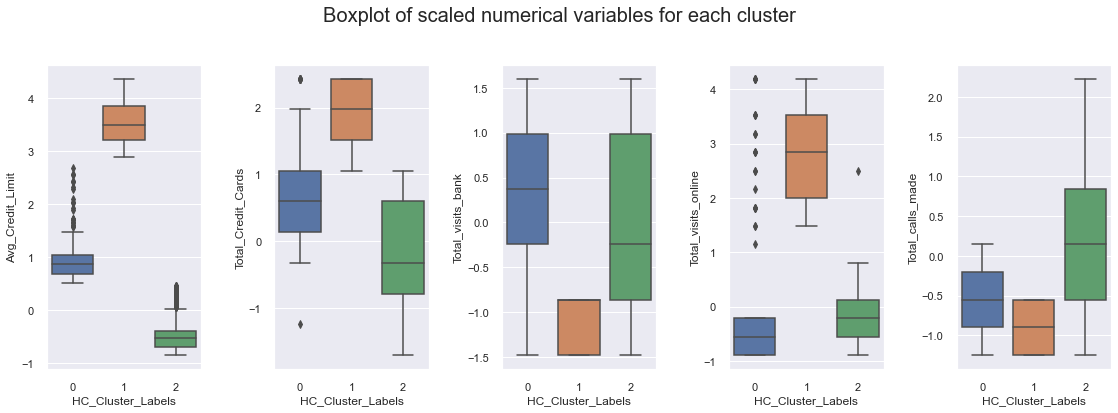

<IPython.core.display.Javascript object>

In [125]:
num_col = subset_scaled_df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["HC_Cluster_Labels"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

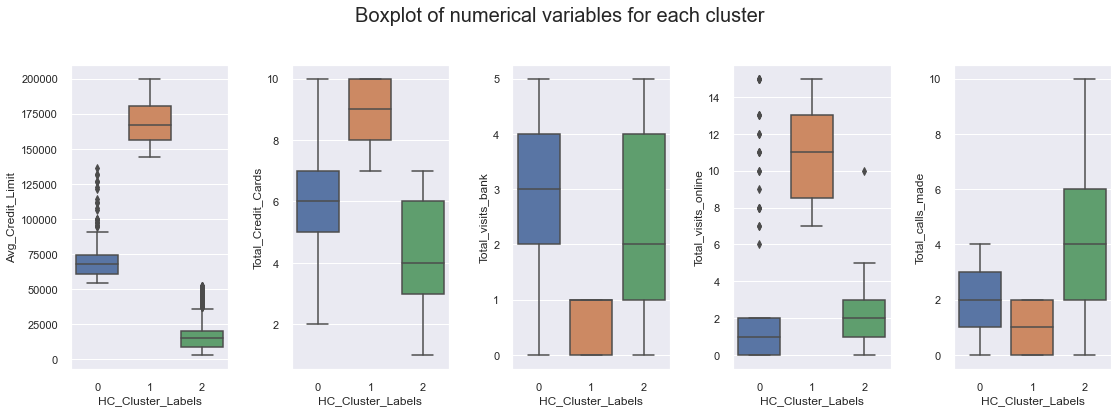

<IPython.core.display.Javascript object>

In [126]:
num_col = df1.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df1["HC_Cluster_Labels"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

***

<font color=orange>

## 44. CLUSTER INSIGHTS (Hierarchical Clustering)


### Observations and Insights 

- **Cluster 0**:
    - 115 Data Objects (115 Customers)
    - Highest Cluster for Total Bank Visits (median of 3).
    - Lowest Cluster for Total Visits Online (median of 1, but contains some meaningful outliers).
    - Average Credit Limit (median ~$71,000) is well above the overall dataset average (and contains many outliers beyond 1.5 times IQR).
    - Total Credit Cards is a wide range (2 through 10), with a median of 6.
    - Total Calls Made is a well-proportioned range with a median of 2 (below the overall dataset median of 3).


- **Cluster 1**:
    - 27 Data Objects (27 Customers)
    - Highest Cluster for Average Credit Limit, Total Credit Cards, and Total Online Visits.
    - Lowest Cluster for Total Bank Visits and Total Calls Made.
    - Ideal Customer Profile -- Imagine if AllLife Bank could nurture and groom their other 622 customers to emulate this Cluster 1 profile.


- **Cluster 2**:
    - 507 Data Objects (507 Customers); The vast majority of AllLife Bank Customers.
    - Highest Cluster for Total Calls Made.
    - Lowest Cluster for Average Credit Limit.
    - Total Credit Cards has a median of 4, which is lower than the dataset median of 5.
    - Total Bank Visits has a very wide IQR.
    - Total Calls Made has a median of 4, which is higher than the dataset median of 4.
   


<font color=orange>

## 45. CONCLUSION / KEY FINDINGS / RECOMMENDATIONS
    

###### OBSERVATIONS:
    
* <span style='color:#0e92ea'>**Up-selling to Existing Customers**:</span> <span style='color:darkblue'>
    
    Using Cluster 1 as a standard of perfection (27 customers), AllLife Bank could further dissect Cluster 2 (507 customers) and Cluster 0 (115 customers) and then target the IQR for each, encouraging these moderate and steady customers to login to online services x number of times per week (such that they are exposed to multiple card offerings, multiple incentives to increase their credit limit, and utilize the website and mobile app more readily. </span> 

* <span style='color:#0e92ea'>**Personalize Campaign to Target New Customers**:</span> <span style='color:darkblue'>
    
    It is apparent that AllLife Bank needs to build a demographic of customers who mirror the 27 customers in Cluster 1.  With other data for Cluster 1 (age, gender, income, neighborhood, home value, etc), AllLife can target new customers who fit this profile.  As well, they can take demographic of the uppermost quartile of Cluster 0 and Cluster 2 to target new customers who may not have a propensity to telephone the bank or physically visit the bank, but who might open multiple credit card accounts and be eligible for high credit limits.  </span> 

* <span style='color:#0e92ea'>**Upgrade Service Delivery Model**:</span> <span style='color:darkblue'>
    
    Teaching current customers the ease of convenience and the benefits of Online Banking should be the top priority of the AllLife Marketing team. By reaching out with electronic correspondences that have easy-to-spot "call-to-action" buttons, the bank can upgrade their service to current customers.  For Cluster 0, the bank can train it's brick-and-mortar personnel to engage with each customer with a focus on how to easily utilize the bank's credit card services 24/7 online, and for Cluster 2 customers, the bank's telecommunication team can be trained to walk customers through the online login and credit card features.</span> 

* <span style='color:#0e92ea'>**Customer Queries are Resolved Faster**:</span> <span style='color:darkblue'>
    
    Although this dataset did not have any time-series data, AllLife Bank can further dissect Cluster 0 and Cluster 2 to identify which customers strictly utilize either physical bank employees and/or telecommunications employees and discover whether or not these sub-groups had access to online services. Perhaps some customers do not use computers or mobile devices, but quicker resolutions occur when certain customers can be guided to utilize faster online services.</span> 